### Import Library and Load the data

In [1]:
# import library 
import pandas as pd
import numpy as np
import time
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import RFE

In [2]:
dataset=pd.read_csv("insurance_claims.csv")

In [3]:
dataset

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25344,POL029984,12.3,1.8,43,C3,4076,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
25345,POL014807,12.2,0.2,40,C1,4990,C1,M11,Petrol,170Nm@4000rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,No,5,0
25346,POL039740,12.1,1.8,57,C2,27003,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
25347,POL056148,3.9,2.2,48,C13,5410,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


## Preprocess the data

In [4]:
dataset.isna().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25349 entries, 0 to 25348
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         25349 non-null  object 
 1   subscription_length               25349 non-null  float64
 2   vehicle_age                       25349 non-null  float64
 3   customer_age                      25349 non-null  int64  
 4   region_code                       25349 non-null  object 
 5   region_density                    25349 non-null  int64  
 6   segment                           25349 non-null  object 
 7   model                             25349 non-null  object 
 8   fuel_type                         25349 non-null  object 
 9   max_torque                        25349 non-null  object 
 10  max_power                         25349 non-null  object 
 11  engine_type                       25349 non-null  object 
 12  airb

## Dropping the unwanted columns

In [6]:
dataset = dataset.drop(['policy_id','max_torque','max_power','model','region_code'], axis=1,errors='ignore')
dataset

,subscription_length,vehicle_age,customer_age,region_density,segment,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,9.3,1.2,41,8794,C2,Diesel,1.5 L U2 CRDi,6,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,8.2,1.8,35,27003,C1,Diesel,i-DTEC,2,No,Yes,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,9.5,0.2,44,8794,C2,Diesel,1.5 L U2 CRDi,6,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,5.2,0.4,44,73430,A,CNG,F8D Petrol Engine,2,No,No,...,No,No,No,Yes,No,No,No,Yes,0,0
4,10.1,1.0,56,5410,B2,Diesel,1.5 Turbocharged Revotorq,2,No,Yes,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25344,12.3,1.8,43,4076,C1,Petrol,1.2 L K12N Dualjet,2,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
25345,12.2,0.2,40,4990,C1,Petrol,1.5 Turbocharged Revotron,2,Yes,No,...,Yes,Yes,Yes,Yes,Yes,No,Yes,No,5,0
25346,12.1,1.8,57,27003,C2,Diesel,1.5 L U2 CRDi,6,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
25347,3.9,2.2,48,5410,B2,Petrol,K Series Dual jet,2,No,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [7]:
dataset[dataset.duplicated()]

,subscription_length,vehicle_age,customer_age,region_density,segment,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
1294,0.1,0.0,54,8794,C2,Diesel,1.5 L U2 CRDi,6,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1346,10.7,2.2,36,8794,B1,CNG,K10C,2,No,No,...,No,Yes,Yes,Yes,No,No,Yes,Yes,2,0
1486,11.2,2.4,39,8794,B2,Petrol,K Series Dual jet,2,No,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
1937,3.4,0.2,35,6112,A,CNG,F8D Petrol Engine,2,No,No,...,No,No,No,Yes,No,No,No,Yes,0,0
2236,1.0,0.0,39,4076,A,CNG,F8D Petrol Engine,2,No,No,...,No,No,No,Yes,No,No,No,Yes,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25111,10.3,2.0,37,8794,C2,Diesel,1.5 L U2 CRDi,6,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
25151,2.6,2.0,50,8794,C2,Diesel,1.5 L U2 CRDi,6,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
25168,4.4,0.2,45,4076,A,CNG,F8D Petrol Engine,2,No,No,...,No,No,No,Yes,No,No,No,Yes,0,0
25191,3.1,0.6,48,4076,A,CNG,F8D Petrol Engine,2,No,No,...,No,No,No,Yes,No,No,No,Yes,0,0


In [8]:
dataset.drop_duplicates(inplace=True)

In [9]:
dataset[dataset.duplicated()]

,subscription_length,vehicle_age,customer_age,region_density,segment,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status


In [10]:
def quanQual(dataset):
    quan=[]
    qual=[]
    for columnName in dataset.columns:
        #print(columnName)
        if(dataset[columnName].dtype=='O'):
            #print("qual")
            qual.append(columnName)
        else:
            #print("quan")
            quan.append(columnName)
    return quan,qual

In [11]:
quan,qaul=quanQual(dataset)

In [12]:
quan

['subscription_length',
 'vehicle_age',
 'customer_age',
 'region_density',
 'airbags',
 'displacement',
 'cylinder',
 'turning_radius',
 'length',
 'width',
 'gross_weight',
 'ncap_rating',
 'claim_status']

In [13]:
qaul

['segment',
 'fuel_type',
 'engine_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [14]:
quan=dataset[quan]

In [15]:
qaul=dataset[qaul]

In [16]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
for column in qaul.columns:
    qaul.loc[:, column] = label_enc.fit_transform(qaul[column])

In [17]:
qaul

,segment,fuel_type,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,4,1,3,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,0,1,1
1,3,1,10,0,1,0,1,1,1,1,...,0,1,0,1,1,1,1,1,1,1
2,4,1,3,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,0,1,1
3,0,0,6,0,0,0,1,0,1,1,...,0,0,0,0,0,1,0,0,0,1
4,2,1,4,0,1,0,1,0,1,1,...,0,0,0,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25344,3,2,2,1,1,0,1,1,1,0,...,0,1,1,1,1,1,1,1,1,1
25345,3,2,5,1,0,0,1,1,1,1,...,0,1,1,1,1,1,1,0,1,0
25346,4,1,3,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,0,1,1
25347,2,2,8,0,1,0,1,0,1,1,...,0,0,1,1,1,1,1,1,1,1


In [18]:
preprocessed=pd.concat([quan,qaul],axis=1)

In [19]:
preprocessed

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,9.3,1.2,41,8794,6,1493,4,5.2,4300,1790,...,1,1,1,1,1,1,1,0,1,1
1,8.2,1.8,35,27003,2,1498,4,4.9,3995,1695,...,0,1,0,1,1,1,1,1,1,1
2,9.5,0.2,44,8794,6,1493,4,5.2,4300,1790,...,1,1,1,1,1,1,1,0,1,1
3,5.2,0.4,44,73430,2,796,3,4.6,3445,1515,...,0,0,0,0,0,1,0,0,0,1
4,10.1,1.0,56,5410,2,1497,4,5.0,3990,1755,...,0,0,0,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25344,12.3,1.8,43,4076,2,1197,4,4.8,3995,1735,...,0,1,1,1,1,1,1,1,1,1
25345,12.2,0.2,40,4990,2,1199,3,5.1,3993,1811,...,0,1,1,1,1,1,1,0,1,0
25346,12.1,1.8,57,27003,6,1493,4,5.2,4300,1790,...,1,1,1,1,1,1,1,0,1,1
25347,3.9,2.2,48,5410,2,1197,4,4.8,3845,1735,...,0,0,1,1,1,1,1,1,1,1


In [20]:
preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24936 entries, 0 to 25348
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   subscription_length               24936 non-null  float64
 1   vehicle_age                       24936 non-null  float64
 2   customer_age                      24936 non-null  int64  
 3   region_density                    24936 non-null  int64  
 4   airbags                           24936 non-null  int64  
 5   displacement                      24936 non-null  int64  
 6   cylinder                          24936 non-null  int64  
 7   turning_radius                    24936 non-null  float64
 8   length                            24936 non-null  int64  
 9   width                             24936 non-null  int64  
 10  gross_weight                      24936 non-null  int64  
 11  ncap_rating                       24936 non-null  int64  
 12  claim_sta

In [21]:
preprocessed.describe()

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,gross_weight,ncap_rating,claim_status
count,24936.000000,24936.000000,24936.000000,24936.000000,24936.000000,24936.000000,24936.000000,24936.000000,24936.000000,24936.000000,24936.000000,24936.000000,24936.000000
mean,6.119045,1.396222,44.830486,18897.379732,3.130374,1164.212063,3.632178,4.853381,3852.057066,1672.649904,1385.433911,1.765359,0.065367
std,4.138495,1.129628,6.952820,17665.540007,1.832259,264.780589,0.482222,0.227580,309.781632,111.844518,212.012965,1.382612,0.247178
min,0.000000,0.000000,35.000000,290.000000,1.000000,796.000000,3.000000,4.500000,3445.000000,1475.000000,1051.000000,0.000000,0.000000
25%,2.100000,0.400000,39.000000,6112.000000,2.000000,998.000000,3.000000,4.600000,3655.000000,1515.000000,1185.000000,0.000000,0.000000
50%,5.700000,1.200000,44.000000,8794.000000,2.000000,1197.000000,4.000000,4.800000,3845.000000,1735.000000,1335.000000,2.000000,0.000000
75%,10.400000,2.200000,49.000000,27003.000000,6.000000,1493.000000,4.000000,5.000000,3995.000000,1755.000000,1510.000000,3.000000,0.000000
max,13.900000,20.000000,73.000000,73430.000000,6.000000,1498.000000,4.000000,5.200000,4300.000000,1811.000000,1720.000000,5.000000,1.000000


## Loading the preprocessed data into new dataset

In [22]:
preprocessed.to_csv('Pre_insurance_data.csv',index = False)

In [23]:
dataset = pd.read_csv('Pre_insurance_data.csv')
dataset

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,9.3,1.2,41,8794,6,1493,4,5.2,4300,1790,...,1,1,1,1,1,1,1,0,1,1
1,8.2,1.8,35,27003,2,1498,4,4.9,3995,1695,...,0,1,0,1,1,1,1,1,1,1
2,9.5,0.2,44,8794,6,1493,4,5.2,4300,1790,...,1,1,1,1,1,1,1,0,1,1
3,5.2,0.4,44,73430,2,796,3,4.6,3445,1515,...,0,0,0,0,0,1,0,0,0,1
4,10.1,1.0,56,5410,2,1497,4,5.0,3990,1755,...,0,0,0,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24931,12.3,1.8,43,4076,2,1197,4,4.8,3995,1735,...,0,1,1,1,1,1,1,1,1,1
24932,12.2,0.2,40,4990,2,1199,3,5.1,3993,1811,...,0,1,1,1,1,1,1,0,1,0
24933,12.1,1.8,57,27003,6,1493,4,5.2,4300,1790,...,1,1,1,1,1,1,1,0,1,1
24934,3.9,2.2,48,5410,2,1197,4,4.8,3845,1735,...,0,0,1,1,1,1,1,1,1,1


In [24]:
dataset['claim_status'].value_counts()

claim_status
0    23306
1     1630
Name: count, dtype: int64

## Data Science - Univariate and Bivariate

In [25]:
#1) - Describing the data.

In [26]:
dataset.describe()

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
count,24936.000000,24936.000000,24936.000000,24936.000000,24936.000000,24936.000000,24936.000000,24936.000000,24936.000000,24936.000000,...,24936.000000,24936.000000,24936.000000,24936.000000,24936.000000,24936.000000,24936.000000,24936.000000,24936.000000,24936.000000
mean,6.119045,1.396222,44.830486,18897.379732,3.130374,1164.212063,3.632178,4.853381,3852.057066,1672.649904,...,0.288258,0.350136,0.551732,0.727863,0.727863,0.977342,0.588226,0.386630,0.727863,0.994305
std,4.138495,1.129628,6.952820,17665.540007,1.832259,264.780589,0.482222,0.227580,309.781632,111.844518,...,0.452961,0.477022,0.497327,0.445069,0.445069,0.148814,0.492165,0.486987,0.445069,0.075249
min,0.000000,0.000000,35.000000,290.000000,1.000000,796.000000,3.000000,4.500000,3445.000000,1475.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.100000,0.400000,39.000000,6112.000000,2.000000,998.000000,3.000000,4.600000,3655.000000,1515.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,5.700000,1.200000,44.000000,8794.000000,2.000000,1197.000000,4.000000,4.800000,3845.000000,1735.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,10.400000,2.200000,49.000000,27003.000000,6.000000,1493.000000,4.000000,5.000000,3995.000000,1755.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,13.900000,20.000000,73.000000,73430.000000,6.000000,1498.000000,4.000000,5.200000,4300.000000,1811.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
dataset['claim_status'].value_counts()


claim_status
0    23306
1     1630
Name: count, dtype: int64

In [28]:
#2) - Creating a table with statistical values.

In [29]:
descriptive = pd.DataFrame(index= ["Mean","Median","Mode",'Q1:25%','Q2:50%','Q3:75%','99%','Q4:100%','IQR',
                                   '1.5 rule','Lesser Outlier','Greater Outlier','Min','Max'],columns=dataset.columns)
for columnname in dataset.columns: # qual store in colname
    descriptive[columnname]['Mean'] = dataset[columnname].mean()
    descriptive[columnname]['Median'] = dataset[columnname].median()
    descriptive[columnname]['Mode'] = dataset[columnname].mode()[0]
    descriptive[columnname]['Q1:25%'] = dataset.describe()[columnname]["25%"]
    descriptive[columnname]['Q2:50%'] = dataset.describe()[columnname]["50%"]
    descriptive[columnname]['Q3:75%'] = dataset.describe()[columnname]["75%"]
    descriptive[columnname]['99%'] = np.percentile(dataset[columnname],99)
    descriptive[columnname]['Q4:100%'] = dataset.describe()[columnname]["max"]
    #IQR = q3-q1
    descriptive[columnname]['IQR'] = descriptive[columnname]["Q3:75%"]-descriptive[columnname]["Q1:25%"]
    #1.5*iqr
    descriptive[columnname]['1.5 rule'] = 1.5*descriptive[columnname]["IQR"]
    #LessOutlier = q1-1.5*iqr
    descriptive[columnname]['Lesser Outlier'] = descriptive[columnname]['Q1:25%']-descriptive[columnname]['1.5 rule']
    #greaterOutlier = q3+1.5*iqr
    descriptive[columnname]['Greater Outlier'] = descriptive[columnname]['Q3:75%']+descriptive[columnname]['1.5 rule']
    descriptive[columnname]['Min'] = dataset[columnname].min()
    descriptive[columnname]['Max'] = dataset[columnname].max()
descriptive

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
Mean,6.119045,1.396222,44.830486,18897.379732,3.130374,1164.212063,3.632178,4.853381,3852.057066,1672.649904,...,0.288258,0.350136,0.551732,0.727863,0.727863,0.977342,0.588226,0.38663,0.727863,0.994305
Median,5.7,1.2,44.0,8794.0,2.0,1197.0,4.0,4.8,3845.0,1735.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
Mode,0.9,0.2,40,8794,2,1197,4,4.8,3445,1735,...,0,0,1,1,1,1,1,0,1,1
Q1:25%,2.1,0.4,39.0,6112.0,2.0,998.0,3.0,4.6,3655.0,1515.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Q2:50%,5.7,1.2,44.0,8794.0,2.0,1197.0,4.0,4.8,3845.0,1735.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
Q3:75%,10.4,2.2,49.0,27003.0,6.0,1493.0,4.0,5.0,3995.0,1755.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
99%,12.4,4.4,63.0,73430.0,6.0,1498.0,4.0,5.2,4300.0,1790.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Q4:100%,13.9,20.0,73.0,73430.0,6.0,1498.0,4.0,5.2,4300.0,1811.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
IQR,8.3,1.8,10.0,20891.0,4.0,495.0,1.0,0.4,340.0,240.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1.5 rule,12.45,2.7,15.0,31336.5,6.0,742.5,1.5,0.6,510.0,360.0,...,1.5,1.5,1.5,1.5,1.5,0.0,1.5,1.5,1.5,0.0


In [30]:
#Checking whether this data contains outlier's or not if present change the outlier to null.

In [31]:
col = dataset.columns

In [32]:
lesser =[]
greater =[]

for columnname in col:
     if columnname == 'claim_status':
        continue  # Skip the claim_status column
  # Lesser outlier --> Min value should not be less than lesser
     if (descriptive[columnname]["Min"]<descriptive[columnname]["Lesser Outlier"]):
        lesser.append(columnname)
  # Greater outlier --> Max value should not be greater than greater.   
     if (descriptive[columnname]["Max"]>descriptive[columnname]["Greater Outlier"]):
        greater.append(columnname) 

In [33]:
lesser

['is_parking_sensors',
 'rear_brakes_type',
 'is_power_steering',
 'is_speed_alert']

In [34]:
greater

['vehicle_age', 'customer_age', 'region_density', 'is_tpms']

In [35]:
for columnname in greater:
    dataset[columnname][dataset[columnname]>descriptive[columnname]["Greater Outlier"]]=descriptive[columnname]["Greater Outlier"]

C:\Users\s\AppData\Local\Temp\ipykernel_14160\741910437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[columnname][dataset[columnname]>descriptive[columnname]["Greater Outlier"]]=descriptive[columnname]["Greater Outlier"]
C:\Users\s\AppData\Local\Temp\ipykernel_14160\741910437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[columnname][dataset[columnname]>descriptive[columnname]["Greater Outlier"]]=descriptive[columnname]["Greater Outlier"]
C:\Users\s\AppData\Local\Temp\ipykernel_14160\741910437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

In [36]:
for columnname in lesser:
    dataset[columnname][dataset[columnname]<descriptive[columnname]["Lesser Outlier"]]=descriptive[columnname]["Lesser Outlier"]

C:\Users\s\AppData\Local\Temp\ipykernel_14160\4049593531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[columnname][dataset[columnname]<descriptive[columnname]["Lesser Outlier"]]=descriptive[columnname]["Lesser Outlier"]
C:\Users\s\AppData\Local\Temp\ipykernel_14160\4049593531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[columnname][dataset[columnname]<descriptive[columnname]["Lesser Outlier"]]=descriptive[columnname]["Lesser Outlier"]
C:\Users\s\AppData\Local\Temp\ipykernel_14160\4049593531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

In [37]:

descriptive = pd.DataFrame(index= ["Mean","Median","Mode",'Q1:25%','Q2:50%','Q3:75%','99%','Q4:100%','IQR',
                                   '1.5 rule','Lesser Outlier','Greater Outlier','Min','Max'],columns=dataset.columns)
for columnname in dataset.columns: # qual store in colname
    descriptive[columnname]['Mean'] = dataset[columnname].mean()
    descriptive[columnname]['Median'] = dataset[columnname].median()
    descriptive[columnname]['Mode'] = dataset[columnname].mode()[0]
    descriptive[columnname]['Q1:25%'] = dataset.describe()[columnname]["25%"]
    descriptive[columnname]['Q2:50%'] = dataset.describe()[columnname]["50%"]
    descriptive[columnname]['Q3:75%'] = dataset.describe()[columnname]["75%"]
    descriptive[columnname]['99%'] = np.percentile(dataset[columnname],99)
    descriptive[columnname]['Q4:100%'] = dataset.describe()[columnname]["max"]
    #IQR = q3-q1
    descriptive[columnname]['IQR'] = descriptive[columnname]["Q3:75%"]-descriptive[columnname]["Q1:25%"]
    #1.5*iqr
    descriptive[columnname]['1.5 rule'] = 1.5*descriptive[columnname]["IQR"]
    #LessOutlier = q1-1.5*iqr
    descriptive[columnname]['Lesser Outlier'] = descriptive[columnname]['Q1:25%']-descriptive[columnname]['1.5 rule']
    #greaterOutlier = q3+1.5*iqr
    descriptive[columnname]['Greater Outlier'] = descriptive[columnname]['Q3:75%']+descriptive[columnname]['1.5 rule']
    descriptive[columnname]['Min'] = dataset[columnname].min()
    descriptive[columnname]['Max'] = dataset[columnname].max()
descriptive

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
Mean,6.119045,1.391065,44.818936,18026.837945,3.130374,1164.212063,3.632178,4.853381,3852.057066,1672.649904,...,0.288258,0.350136,0.551732,0.727863,0.727863,1.0,0.588226,0.38663,0.727863,1.0
Median,5.7,1.2,44.0,8794.0,2.0,1197.0,4.0,4.8,3845.0,1735.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
Mode,0.9,0.2,40,8794.0,2,1197,4,4.8,3445,1735,...,0,0,1,1,1,1,1,0,1,1
Q1:25%,2.1,0.4,39.0,6112.0,2.0,998.0,3.0,4.6,3655.0,1515.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Q2:50%,5.7,1.2,44.0,8794.0,2.0,1197.0,4.0,4.8,3845.0,1735.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
Q3:75%,10.4,2.2,49.0,27003.0,6.0,1493.0,4.0,5.0,3995.0,1755.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
99%,12.4,4.4,63.0,58339.5,6.0,1498.0,4.0,5.2,4300.0,1790.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Q4:100%,13.9,4.9,64.0,58339.5,6.0,1498.0,4.0,5.2,4300.0,1811.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
IQR,8.3,1.8,10.0,20891.0,4.0,495.0,1.0,0.4,340.0,240.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1.5 rule,12.45,2.7,15.0,31336.5,6.0,742.5,1.5,0.6,510.0,360.0,...,1.5,1.5,1.5,1.5,1.5,0.0,1.5,1.5,1.5,0.0


In [38]:
lesser =[]
greater =[]

for columnname in col:
     if columnname == 'claim_status':
        continue  # Skip the claim_status column
  # Lesser outlier --> Min value should not be less than lesser
     if (descriptive[columnname]["Min"]<descriptive[columnname]["Lesser Outlier"]):
        lesser.append(columnname)
  # Greater outlier --> Max value should not be greater than greater.   
     if (descriptive[columnname]["Max"]>descriptive[columnname]["Greater Outlier"]):
        greater.append(columnname)    

In [39]:
lesser

[]

In [40]:
greater

[]

In [41]:
dataset

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,9.3,1.2,41,8794.0,6,1493,4,5.2,4300,1790,...,1,1,1,1,1,1,1,0,1,1
1,8.2,1.8,35,27003.0,2,1498,4,4.9,3995,1695,...,0,1,0,1,1,1,1,1,1,1
2,9.5,0.2,44,8794.0,6,1493,4,5.2,4300,1790,...,1,1,1,1,1,1,1,0,1,1
3,5.2,0.4,44,58339.5,2,796,3,4.6,3445,1515,...,0,0,0,0,0,1,0,0,0,1
4,10.1,1.0,56,5410.0,2,1497,4,5.0,3990,1755,...,0,0,0,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24931,12.3,1.8,43,4076.0,2,1197,4,4.8,3995,1735,...,0,1,1,1,1,1,1,1,1,1
24932,12.2,0.2,40,4990.0,2,1199,3,5.1,3993,1811,...,0,1,1,1,1,1,1,0,1,1
24933,12.1,1.8,57,27003.0,6,1493,4,5.2,4300,1790,...,1,1,1,1,1,1,1,0,1,1
24934,3.9,2.2,48,5410.0,2,1197,4,4.8,3845,1735,...,0,0,1,1,1,1,1,1,1,1


## Exploratory Data Analysis

In [42]:
dataset['claim_status'].value_counts()


claim_status
0    23306
1     1630
Name: count, dtype: int64

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix 

In [44]:
counts = dataset['claim_status'].value_counts().reset_index()
counts.columns = ['claim_status', 'Count']
counts


,claim_status,Count
0,0,23306
1,1,1630


### 1.What is the distribution of the target variable (claim_status)?

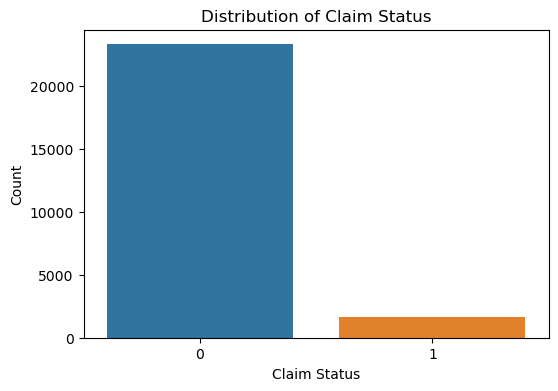


Percentage distribution of Claim Status:
claim_status
0    93.463266
1     6.536734
Name: proportion, dtype: float64


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='claim_status', data=dataset)
plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

print("\nPercentage distribution of Claim Status:")
print(dataset['claim_status'].value_counts(normalize=True) * 100)

#### Class 0 (No Claim):   93.46% of the data (majority class).  This means that in most cases, customers did not file any insurance claim.

#### Class 1 (Claim):  6.53% of the data (minority class).  Only a small proportion of customers have actually filed insurance claims.

### 2.How do numerical independent variables relate to claim_status?

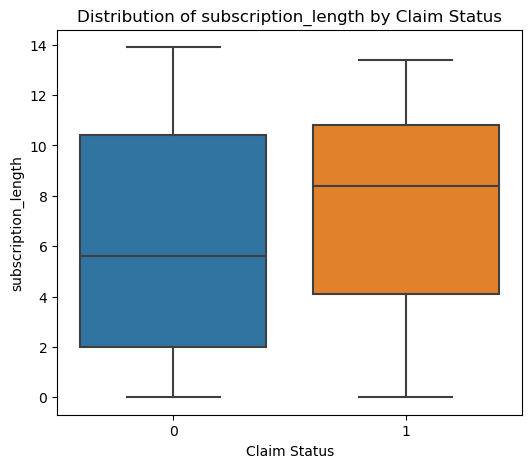

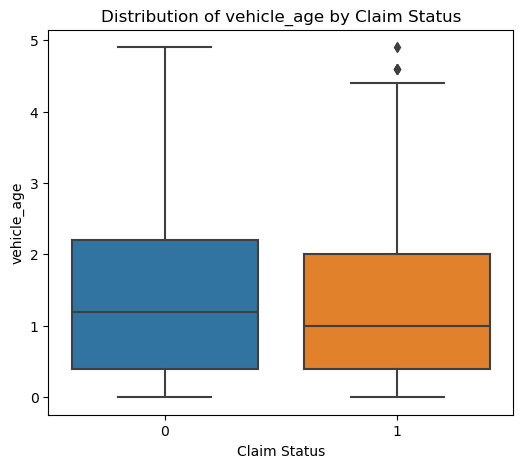

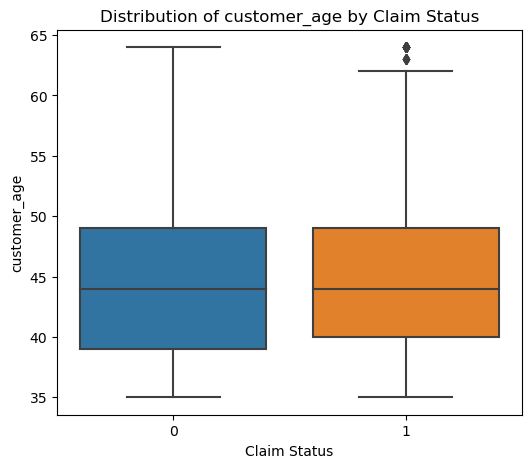

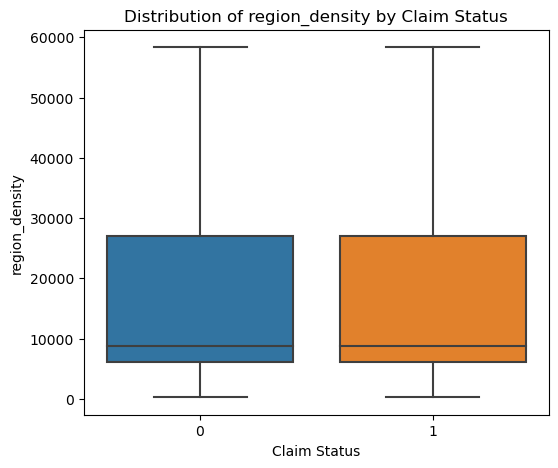

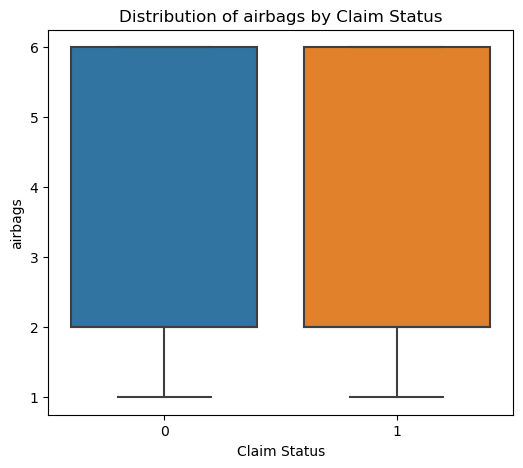

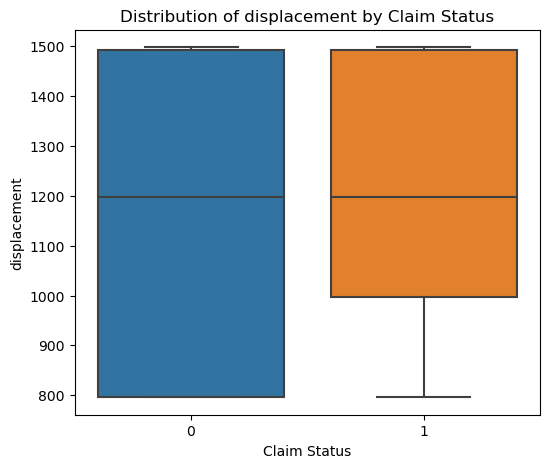

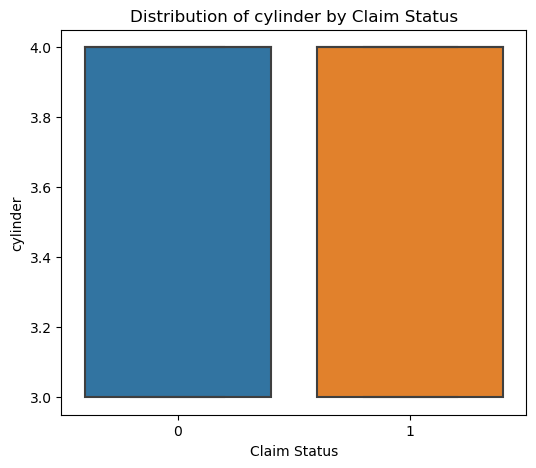

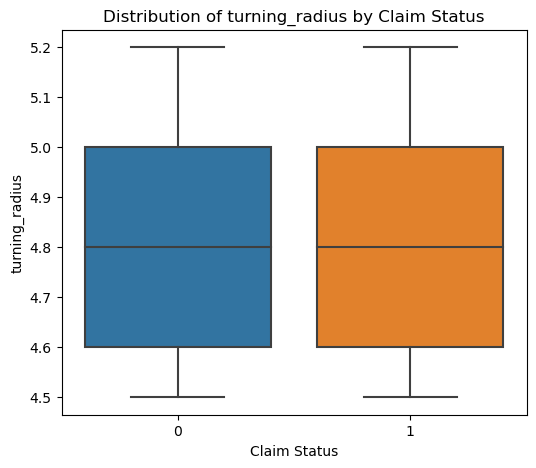

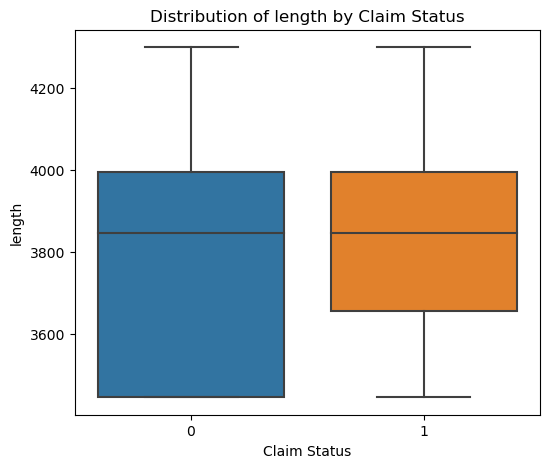

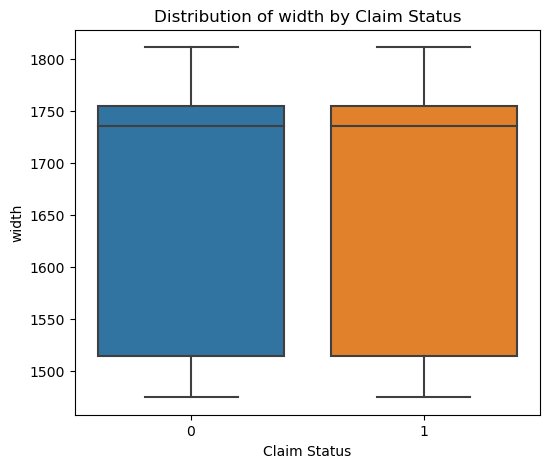

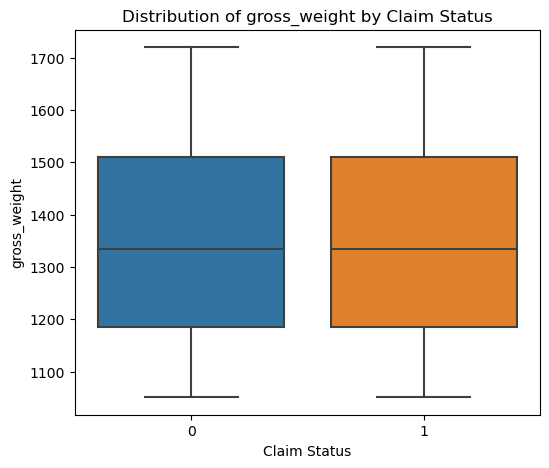

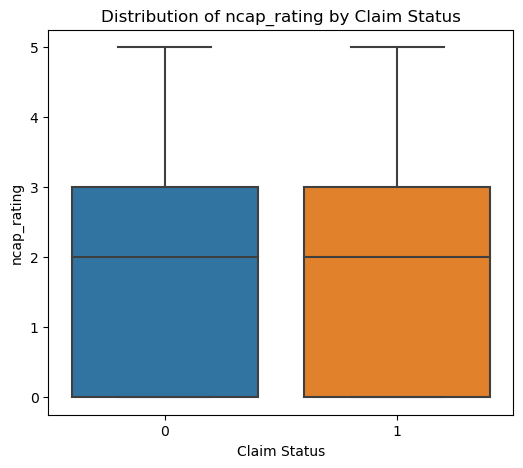

In [46]:
numerical_cols = ['subscription_length', 'vehicle_age', 'customer_age', 'region_density',
                  'airbags', 'displacement', 'cylinder', 'turning_radius', 'length',
                  'width', 'gross_weight', 'ncap_rating'] 

for col in numerical_cols:
    plt.figure(figsize=(6, 5))
    sns.boxplot(x=dataset['claim_status'], y=dataset[col])
    plt.title(f'Distribution of {col} by Claim Status')
    plt.xlabel('Claim Status')
    plt.ylabel(col)
    plt.show()

### 3. How do categorical independent variables relate to claim_status?

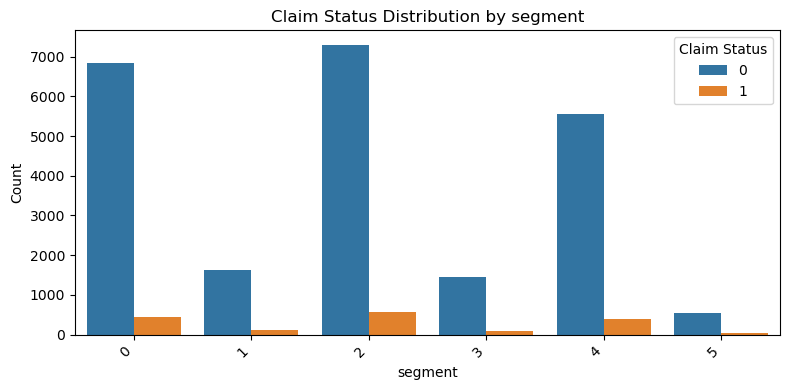

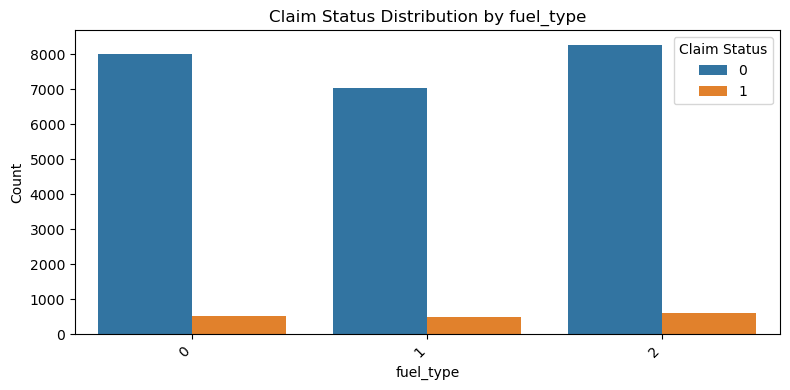

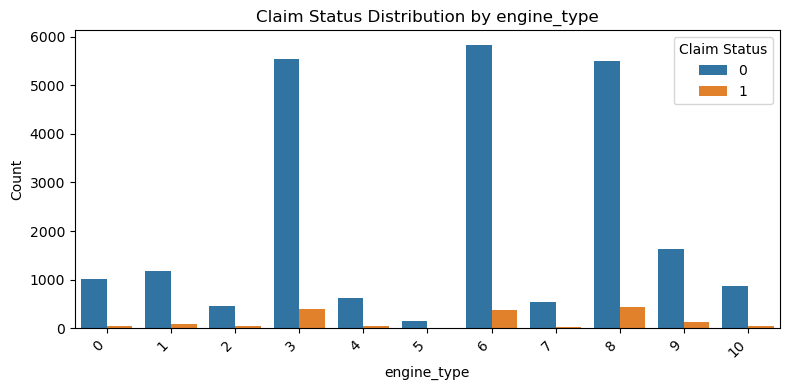

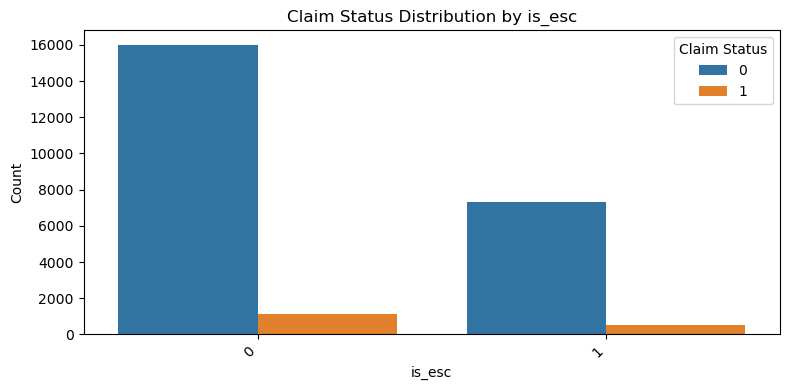

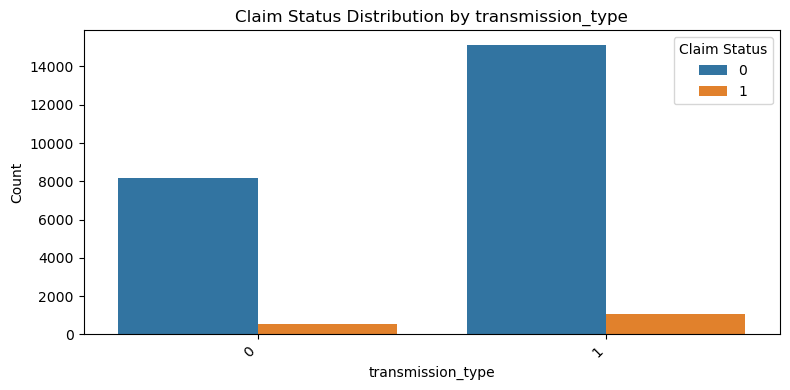

In [47]:
categorical_cols = ['segment', 'fuel_type', 'engine_type', 'is_esc', 'transmission_type'] 

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=dataset[col], hue=dataset['claim_status'], data=pd.concat([dataset, dataset], axis=1))
    plt.title(f'Claim Status Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Claim Status')
    plt.tight_layout()
    plt.show()

### 4. Are there any correlations between numerical independent variables?

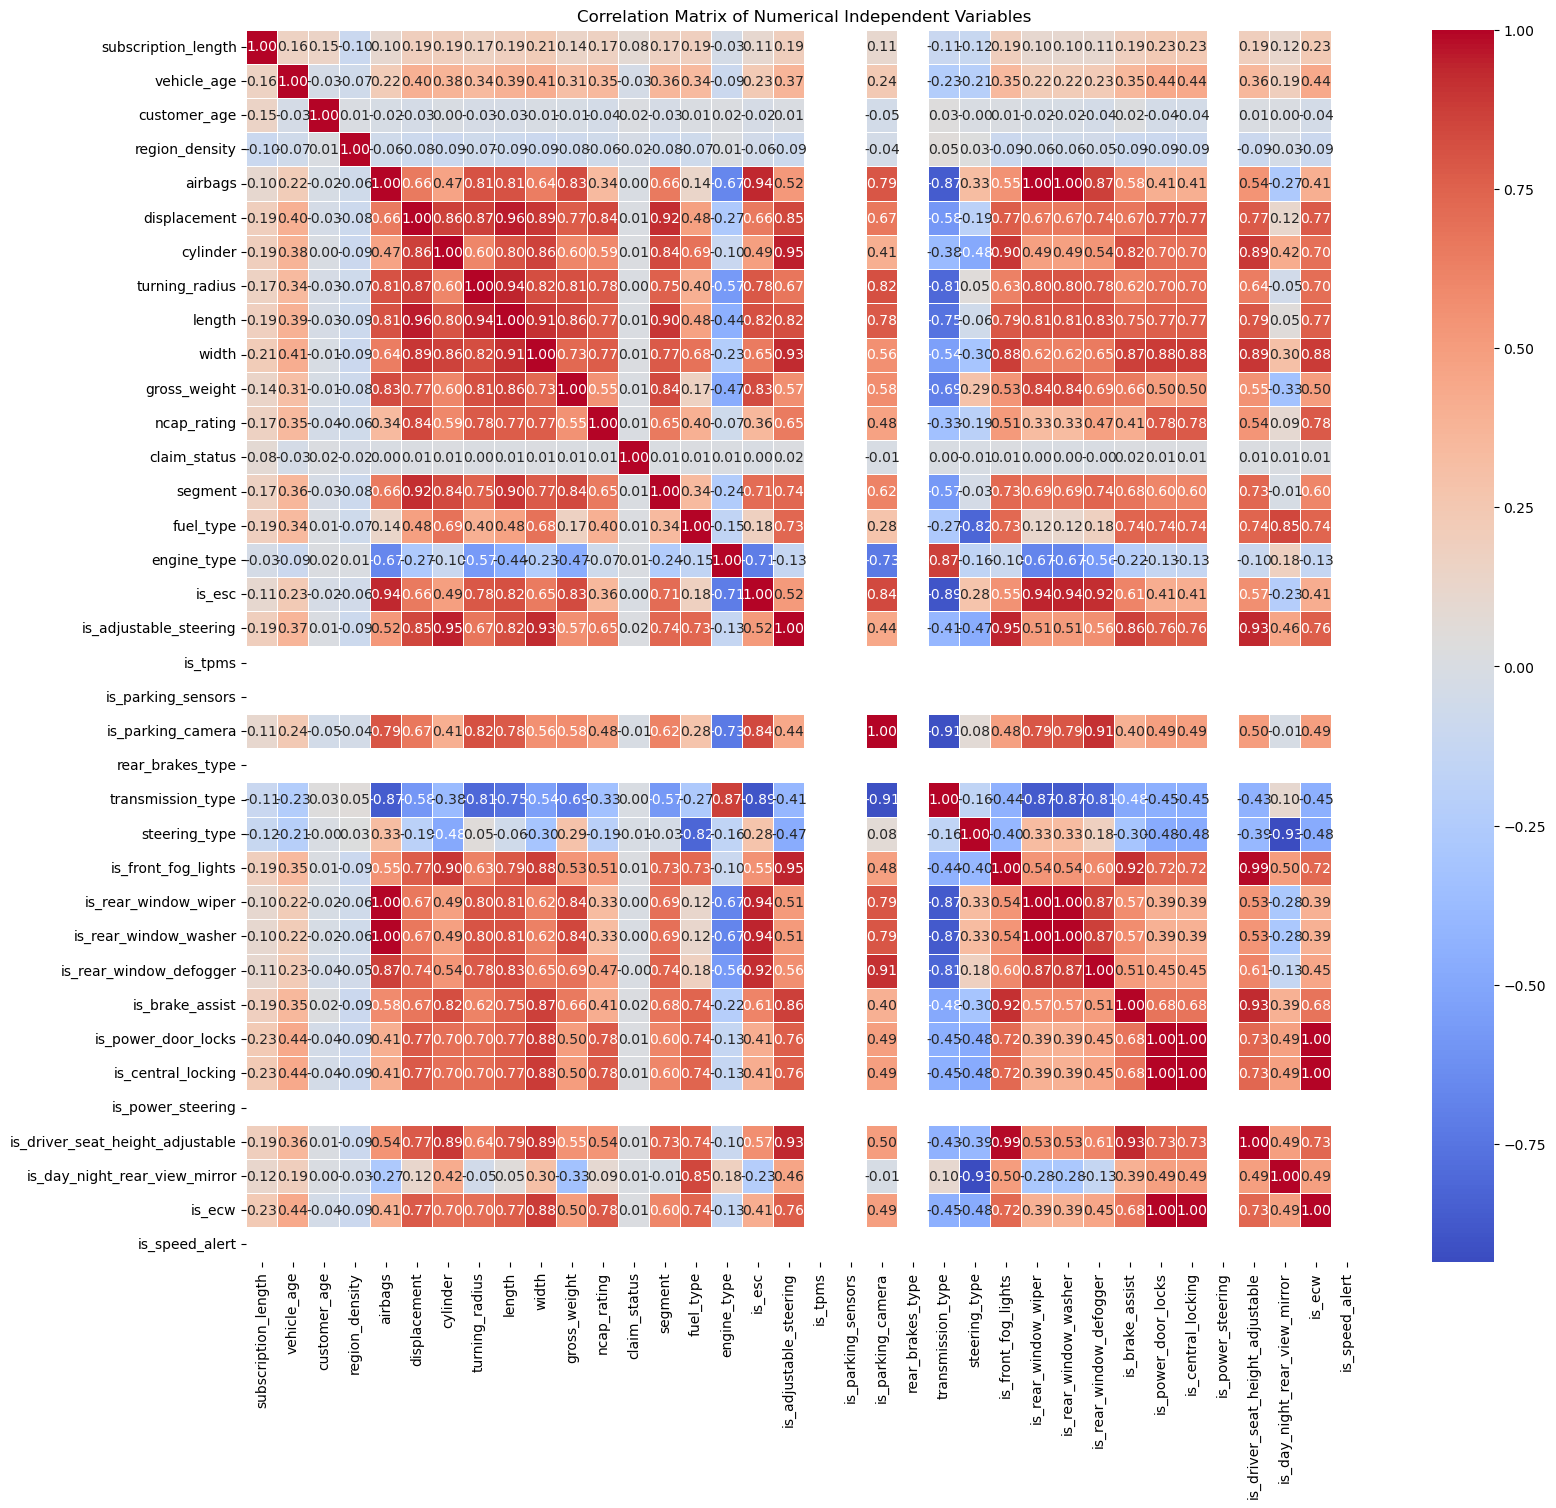

In [48]:
numerical_cols_for_corr = dataset.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = dataset[numerical_cols_for_corr].corr()

plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Independent Variables')
plt.show()

### 5.What are the unique values and their counts for key categorical independent variables?

In [49]:
selected_categorical_cols = ['segment', 'fuel_type', 'engine_type', 'rear_brakes_type', 'transmission_type', 'steering_type']

for col in selected_categorical_cols:
    print(f"\nUnique values and counts for '{col}':")
    print(dataset[col].value_counts())
    print("-" * 30)


Unique values and counts for 'segment':
segment
2    7854
0    7280
4    5944
1    1750
3    1543
5     565
Name: count, dtype: int64
------------------------------

Unique values and counts for 'fuel_type':
fuel_type
2    8873
0    8536
1    7527
Name: count, dtype: int64
------------------------------

Unique values and counts for 'engine_type':
engine_type
6     6221
3     5944
8     5937
9     1750
1     1244
0     1059
10     910
4      673
7      565
2      491
5      142
Name: count, dtype: int64
------------------------------

Unique values and counts for 'rear_brakes_type':
rear_brakes_type
1    24936
Name: count, dtype: int64
------------------------------

Unique values and counts for 'transmission_type':
transmission_type
1    16198
0     8738
Name: count, dtype: int64
------------------------------

Unique values and counts for 'steering_type':
steering_type
2    14057
0    10314
1      565
Name: count, dtype: int64
------------------------------


### 6. Distribution of Numerical Independent Variables (Histograms/KDE plots)

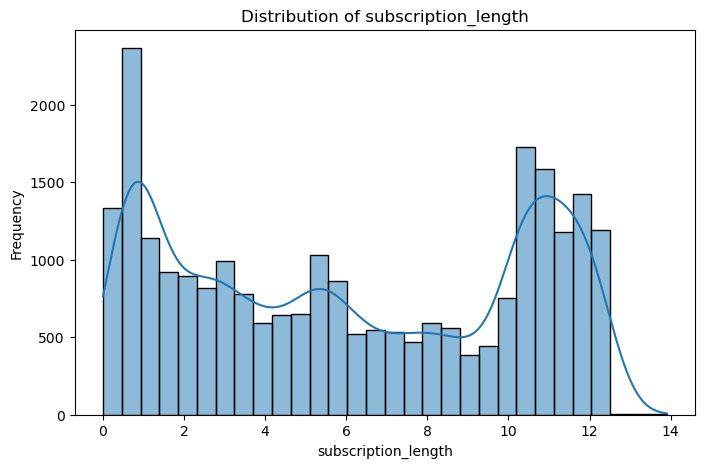

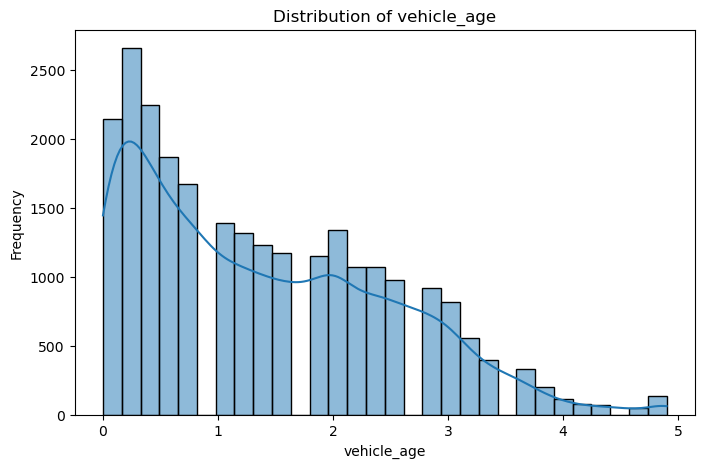

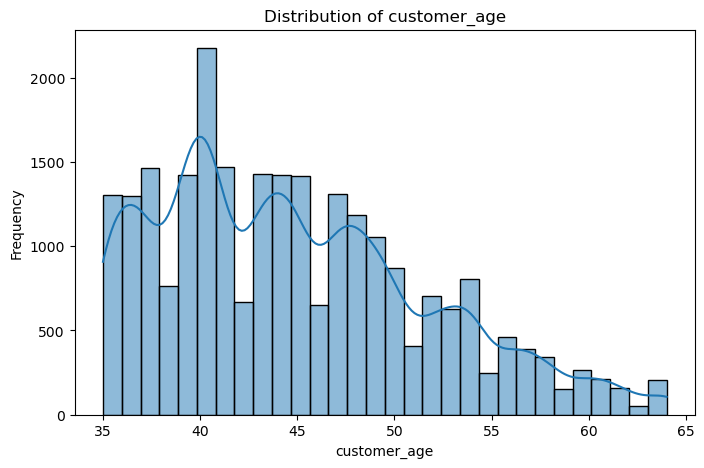

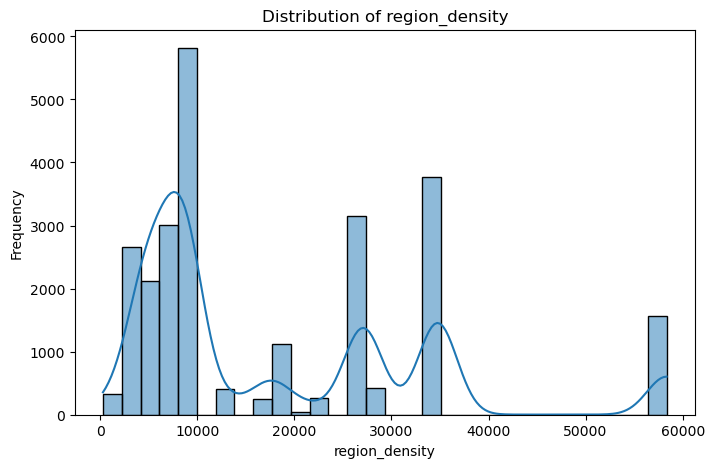

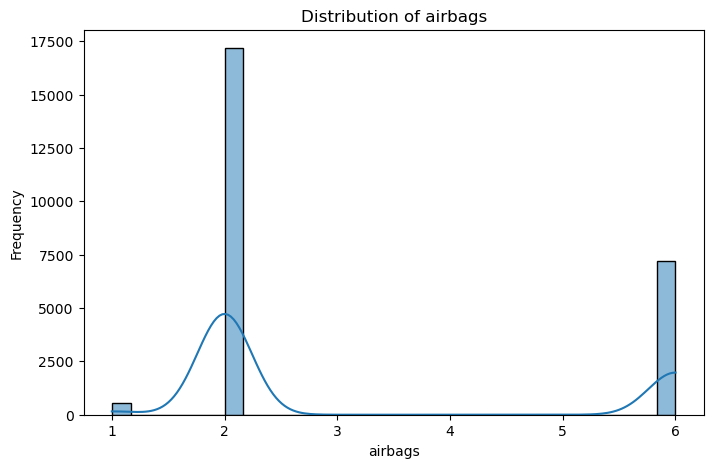

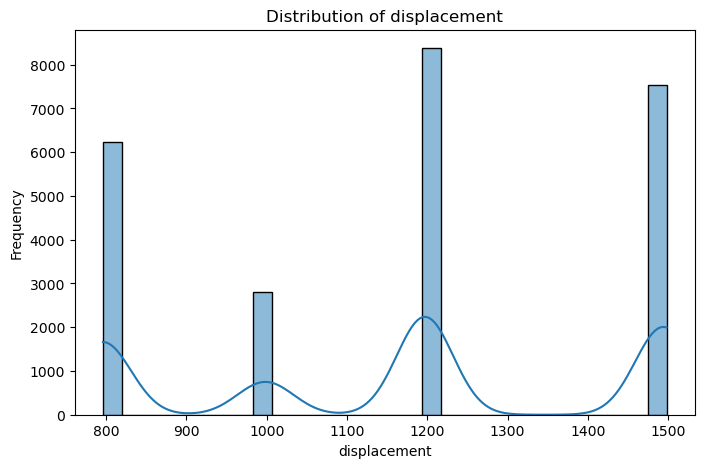

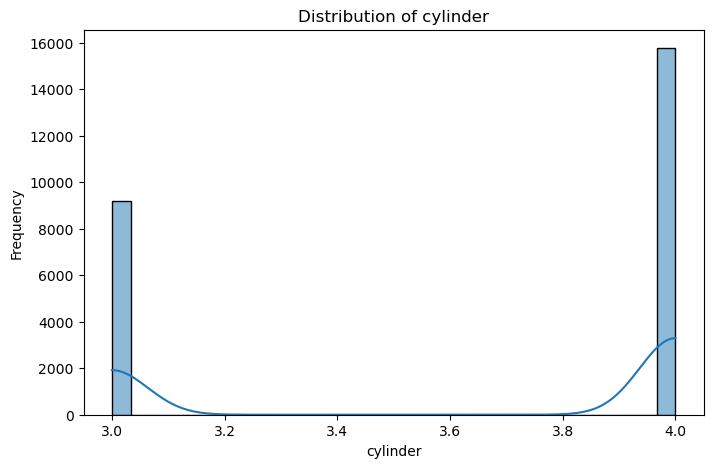

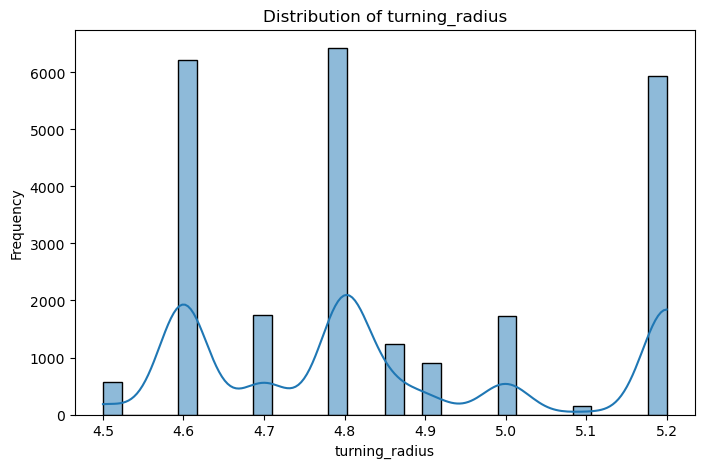

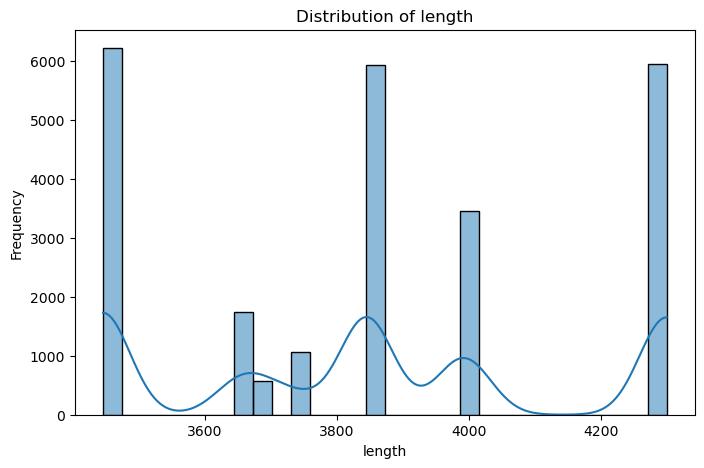

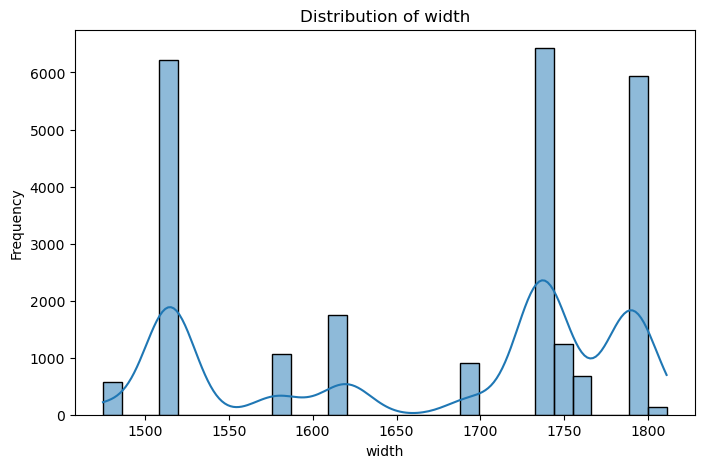

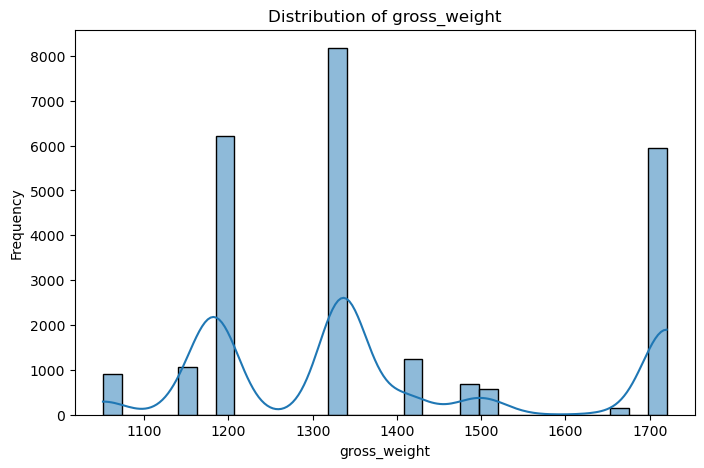

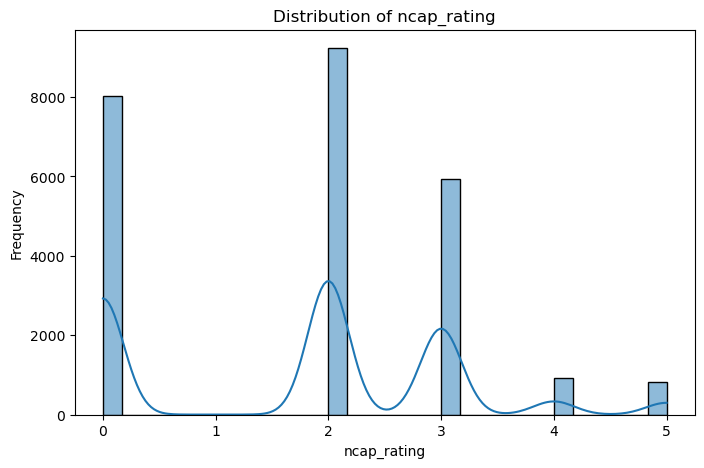

In [50]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(dataset[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### 7. Pairplot of a subset of numerical variables colored by claim_status

C:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


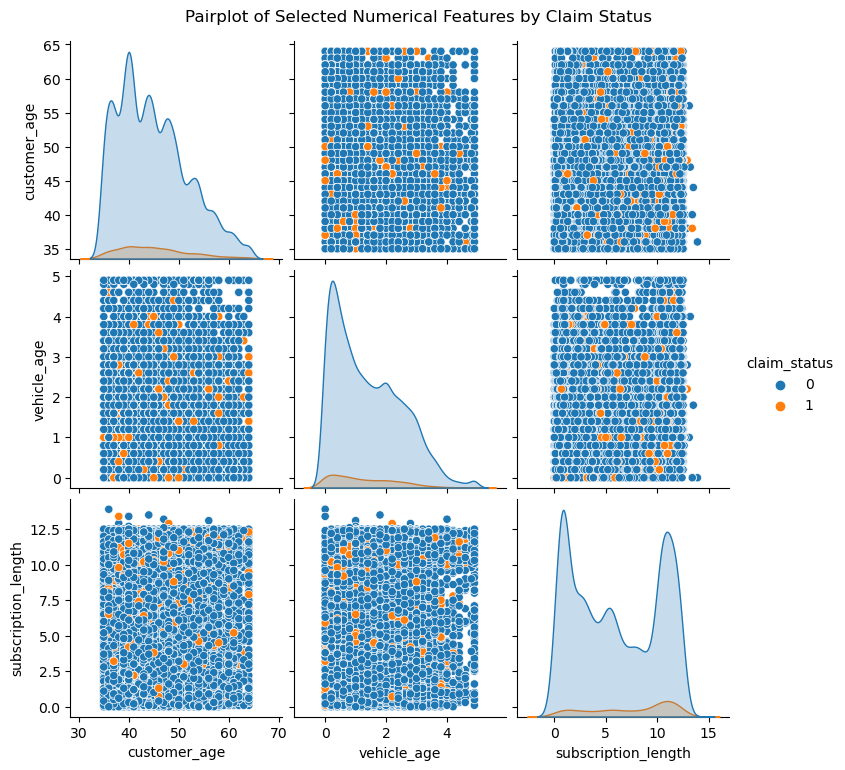

In [51]:
pairplot_cols = ['customer_age', 'vehicle_age', 'subscription_length', 'claim_status']
sns.pairplot(dataset[pairplot_cols], hue='claim_status', diag_kind='kde')
plt.suptitle('Pairplot of Selected Numerical Features by Claim Status', y=1.02)
plt.show()

### 8. Count plots for all binary 'is_' features



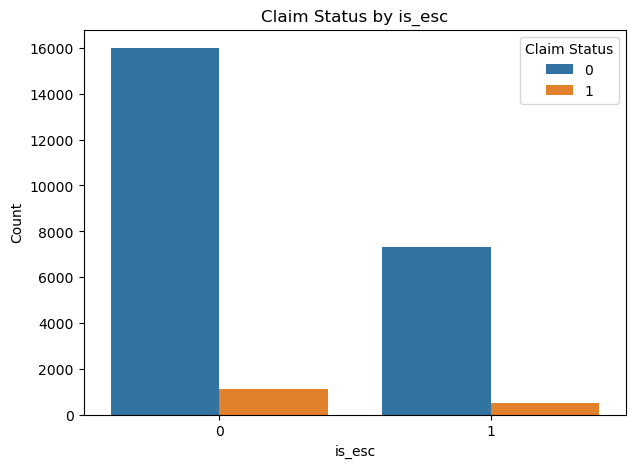

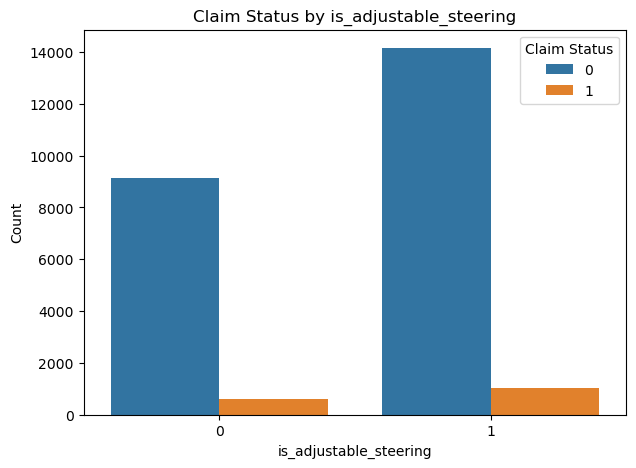

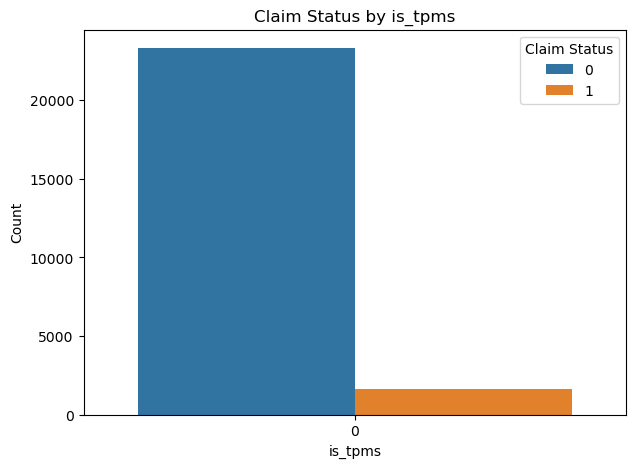

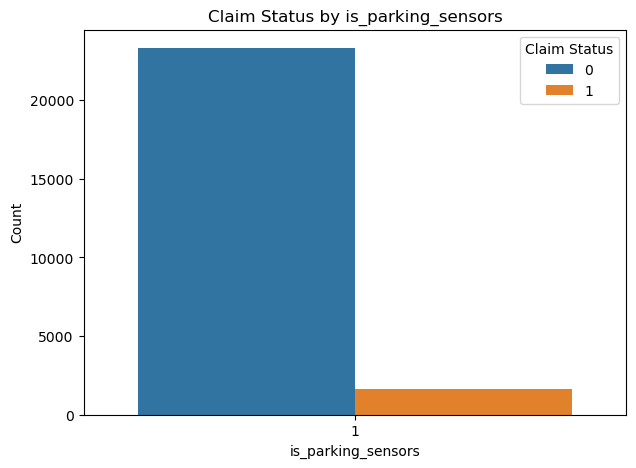

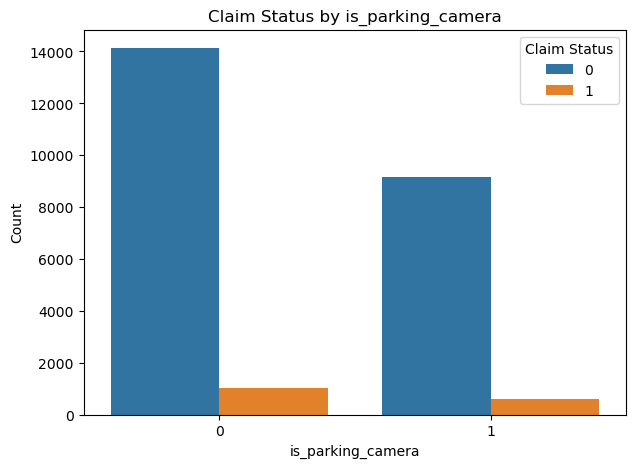

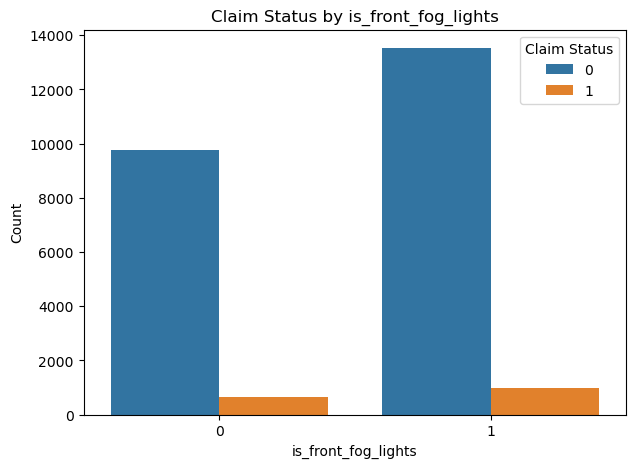

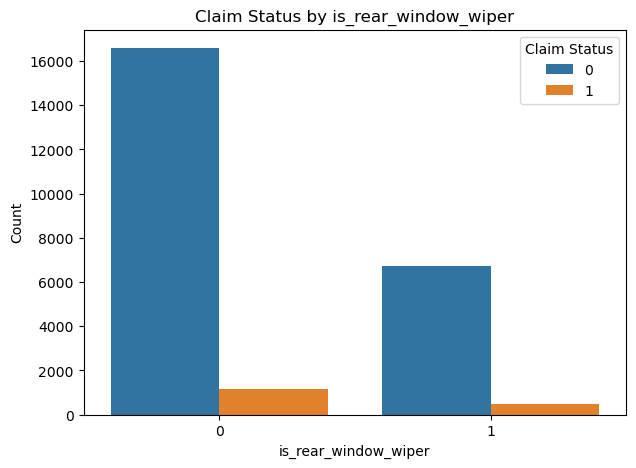

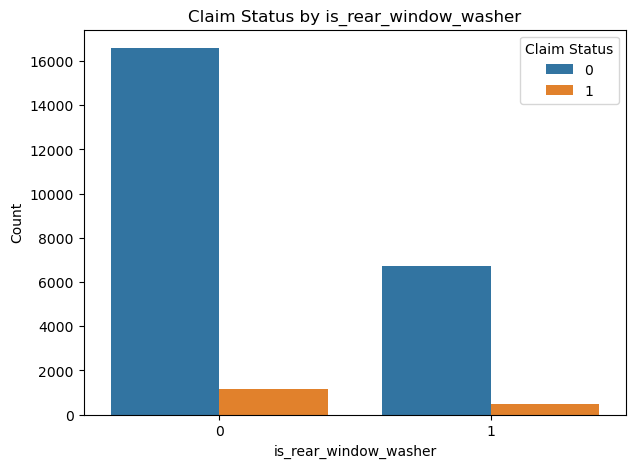

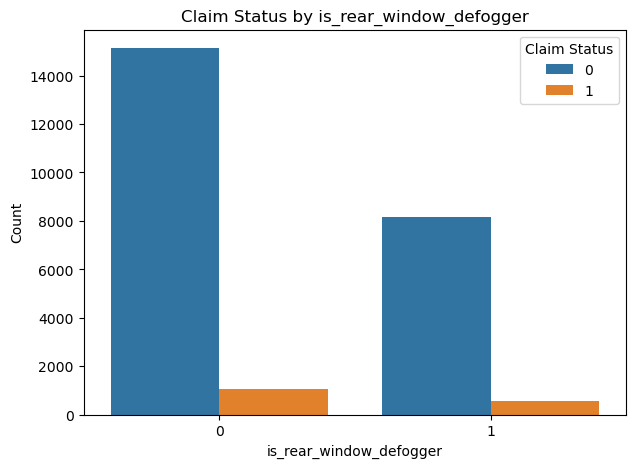

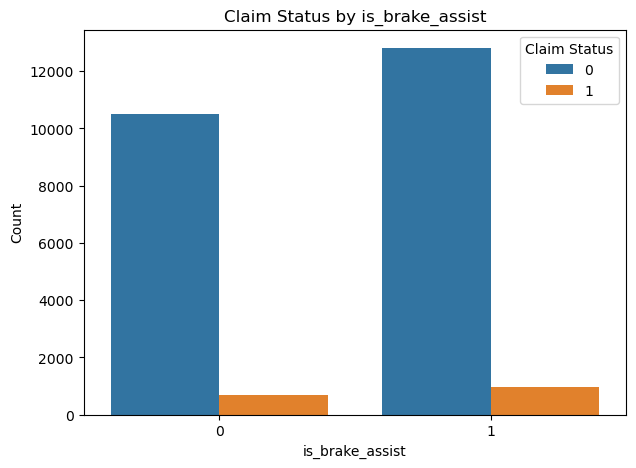

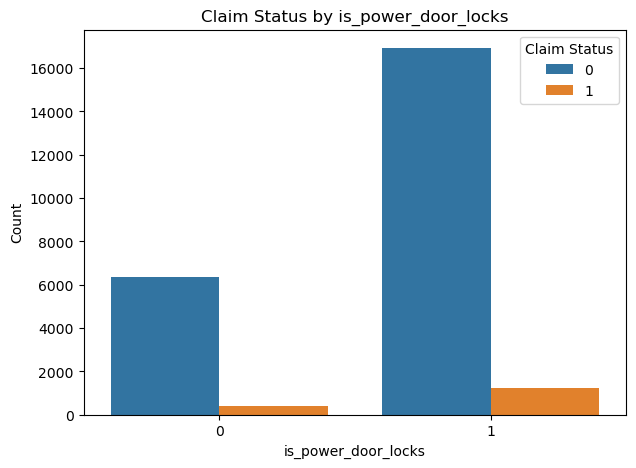

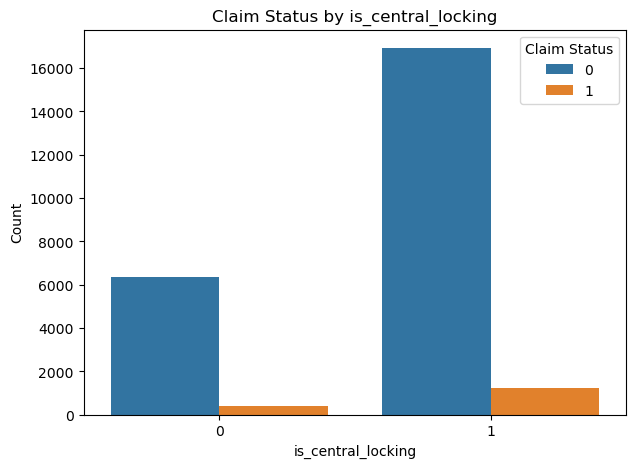

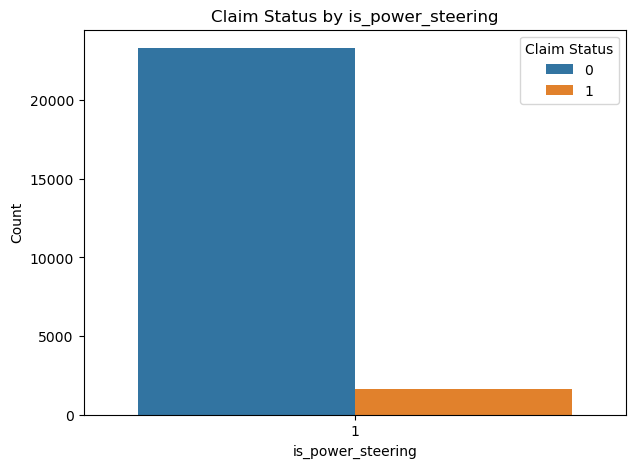

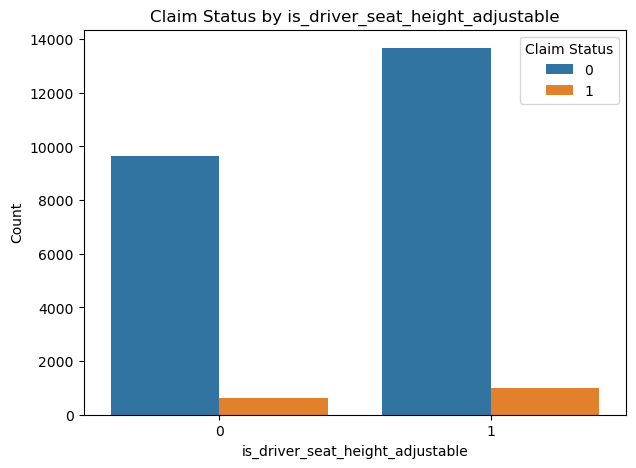

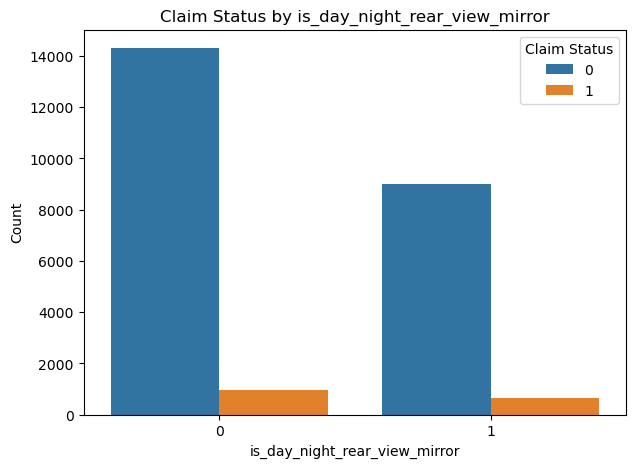

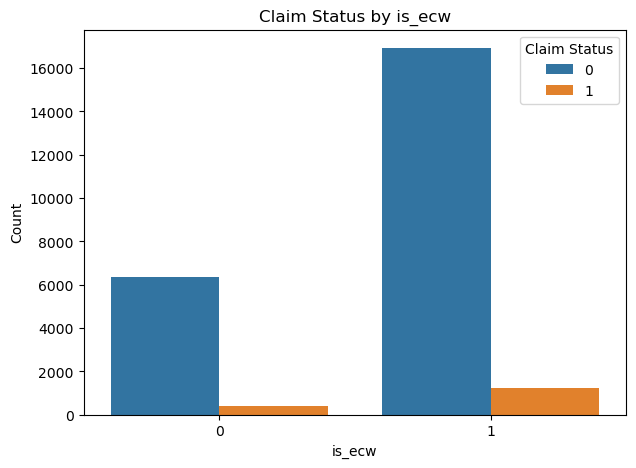

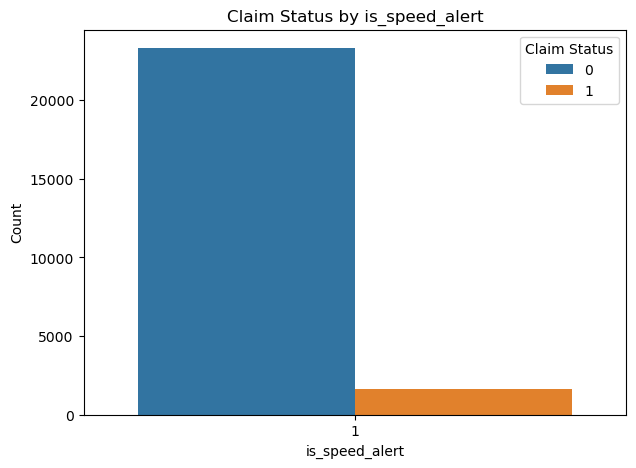

In [52]:
binary_cols = [col for col in dataset.columns if col.startswith('is_')]

for col in binary_cols:
    plt.figure(figsize=(7, 5))
    sns.countplot(x=col, hue='claim_status', data=dataset)
    plt.title(f'Claim Status by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Claim Status')
    plt.show()

### 9. Violin plots for selected numerical features to show distribution and density by claim status


In [53]:
# Violin plots are similar to box plots but also show the probability density of the data at different values.

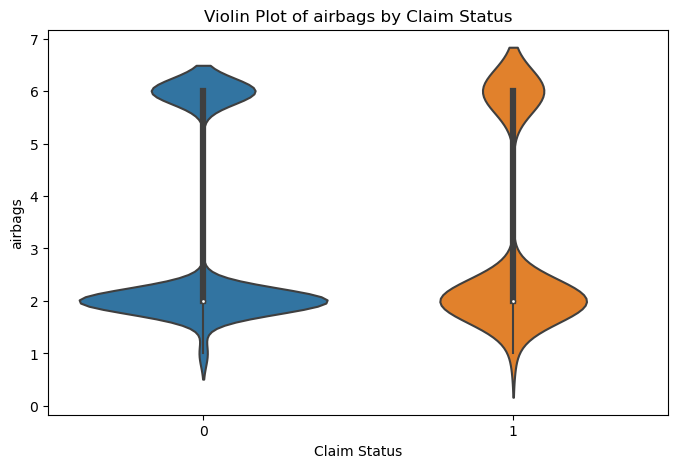

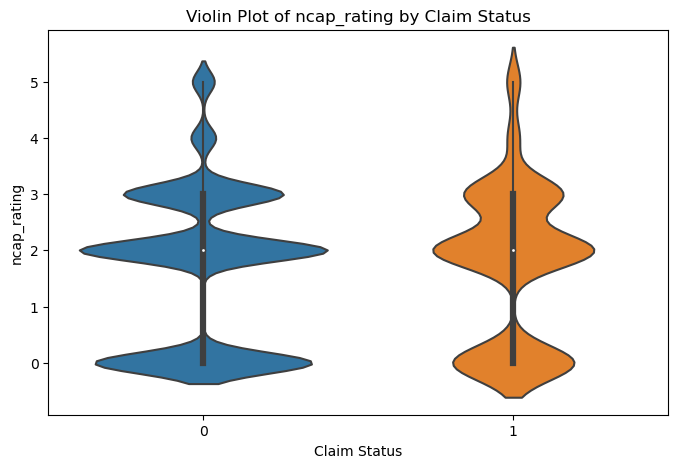

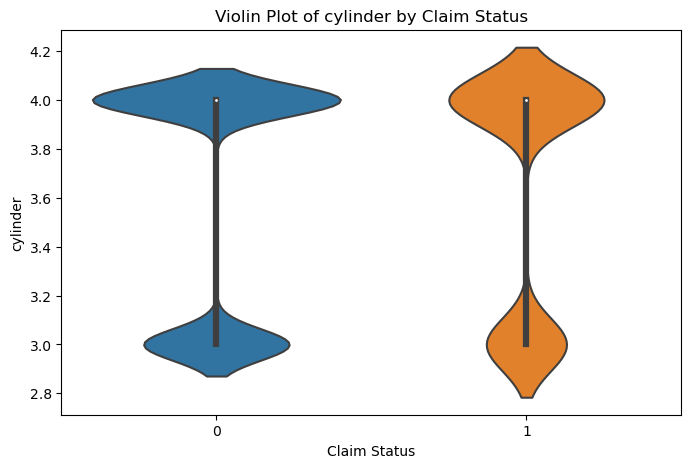

In [54]:
violin_cols = ['airbags', 'ncap_rating', 'cylinder']

for col in violin_cols:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='claim_status', y=col, data=dataset)
    plt.title(f'Violin Plot of {col} by Claim Status')
    plt.xlabel('Claim Status')
    plt.ylabel(col)
    plt.show()

#### Airbags: Similar distribution in both groups → not a strong predictor.
#### NCAP Rating: Lower ratings more common in claims → may affect risk.
#### Cylinders: Almost same in both → little impact on claims.
#### Only NCAP rating shows some influence on claim status.

### 10. Distribution of 'region_density' across 'claim_status'


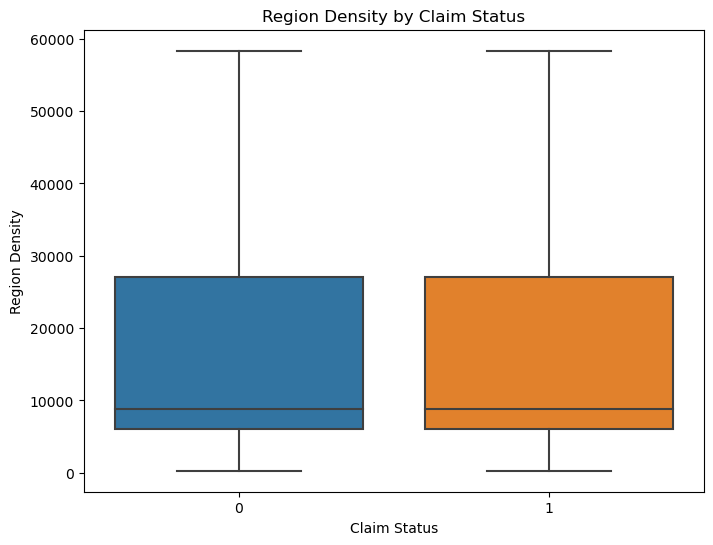

In [55]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='claim_status', y='region_density', data=dataset)
plt.title('Region Density by Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Region Density')
plt.show()

### 11.What is the distribution of different Fuel Type in the dataset?

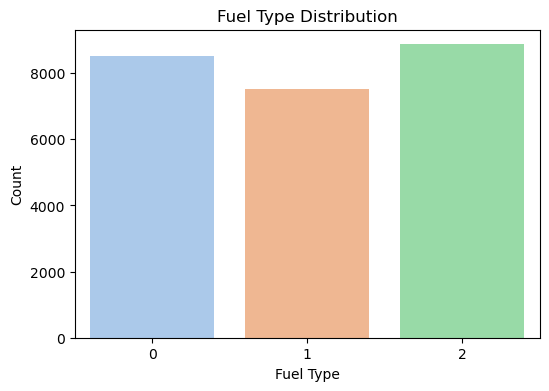

In [56]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='fuel_type', palette='pastel')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Fuel Type Distribution')
plt.show()

#### The dataset has three fuel types:
#### Type 2 is the most common
#### Type 1 is the least common
#### Type 0 is slightly less than Type 2
#### All fuel types are fairly balanced, with a slight preference for Type 2.

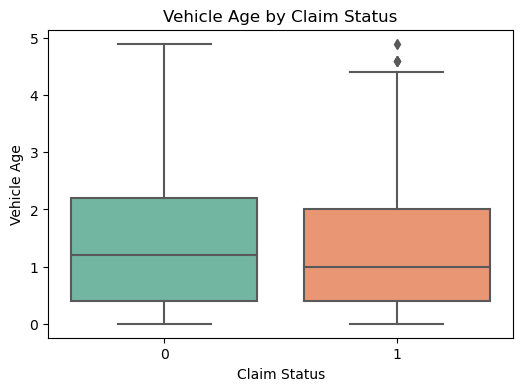

In [57]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=dataset, x='claim_status', y='vehicle_age', palette='Set2')
plt.xlabel('Claim Status')
plt.ylabel('Vehicle Age')
plt.title('Vehicle Age by Claim Status')
plt.show()

#### Both claim and non-claim groups have similar vehicle age ranges.
#### Claims are slightly more common for newer vehicles (lower median age).
#### A few outliers exist in the claim group (older vehicles).
#### Claims tend to occur slightly more with newer vehicles.

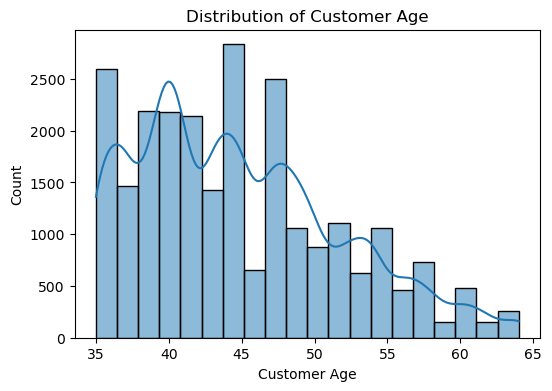

In [58]:
plt.figure(figsize=(6, 4))
sns.histplot(data=dataset, x='customer_age', bins=20, kde=True)
plt.xlabel('Customer Age')
plt.title('Distribution of Customer Age')
plt.show()

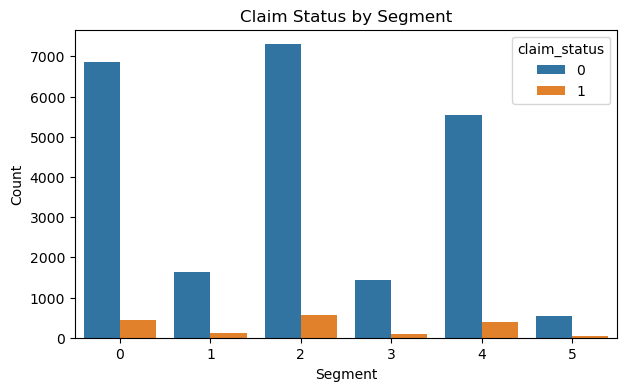

In [59]:
plt.figure(figsize=(7, 4))
sns.countplot(data=dataset, x='segment', hue='claim_status')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Claim Status by Segment')
plt.show()


#### All segments have many more non-claim cases than claims.
#### Segment 2 and 0 have the highest total and claim counts.
#### Segment 1 and 5 have very few claims.
#### Claim frequency varies by segment, but claims are low overall across all segments.

In [60]:
numerical_columns = dataset[['subscription_length', 'vehicle_age', 'customer_age']].columns
numerical_columns

Index(['subscription_length', 'vehicle_age', 'customer_age'], dtype='object')

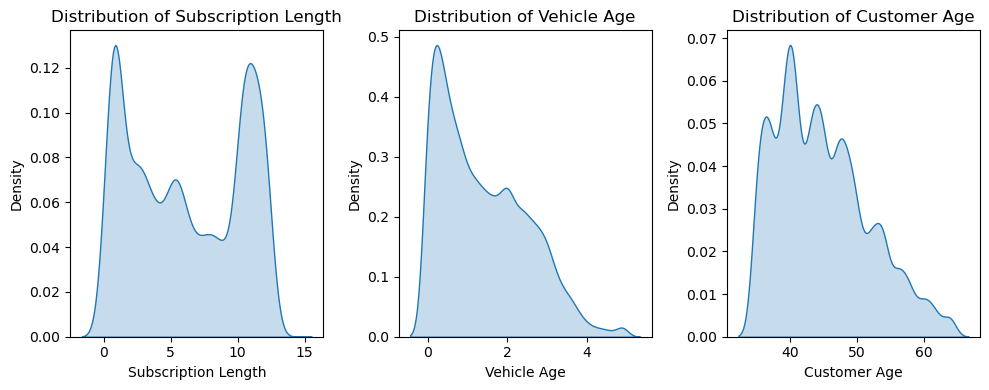

In [61]:
# plotting distributions of numerical features
plt.figure(figsize=(10, 4))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3, 3, i)
    sns.kdeplot(dataset[col], fill = True) 
    plt.title(f'Distribution of {" ".join([el.title() for el in col.split("_")])}')
    plt.xlabel(f'{" ".join([el.title() for el in col.split("_")])}')

plt.tight_layout()
plt.show()

In [62]:
from scipy.stats import ttest_ind

# Separate groups
claim_group = dataset[dataset['claim_status'] == 1]['vehicle_age']
no_claim_group = dataset[dataset['claim_status'] == 0]['vehicle_age']

# t-test
t_stat, p_value = ttest_ind(claim_group, no_claim_group)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


t-statistic: -4.481478869206059
p-value: 7.445724483972743e-06


C:\Users\s\AppData\Local\Temp\ipykernel_14160\3621162437.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  graph = sns.distplot(dataset,kde = True,kde_kws={'color':'red'},color='green')


Mean: 0.06536734039140199 Std Dev: 0.24717787390864104


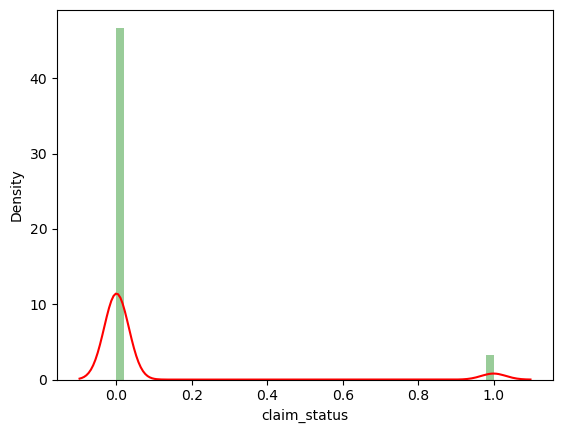

In [63]:
def get_pdf_probability(dataset): # creating a function with dataset,start and end range of the data.
    from matplotlib import pyplot as py # importing lib
    import seaborn as sns
    graph = sns.distplot(dataset,kde = True,kde_kws={'color':'red'},color='green')
    # kde(Kernal density function) - for curve, kde_kws - for color of that curve, colour green is for that histo colour.
    
    #generate a sample mean and std
    sample = dataset
    # to find a mean and std dev
    sample_mean = sample.mean()
    sample_std = sample.std()
#     print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    print("Mean:",sample_mean, "Std Dev:",sample_std)
    #to define normal dist
    from scipy.stats import norm # norm is an inbuilt func need to import library
    dist = norm(sample_mean, sample_std) # to find the normal distribution 
    
get_pdf_probability(dataset['claim_status']) # here the column name is ssc_p and start range is 50, end range is 70 
# so the conclusion is nearly 53% of students scored 50 to 70 marks.

### How do 'fuel_type' and 'engine_type' distributions affect 'claim_status'?

C:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\s\AppData\Local\Temp\ipykernel_14160\1700515839.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


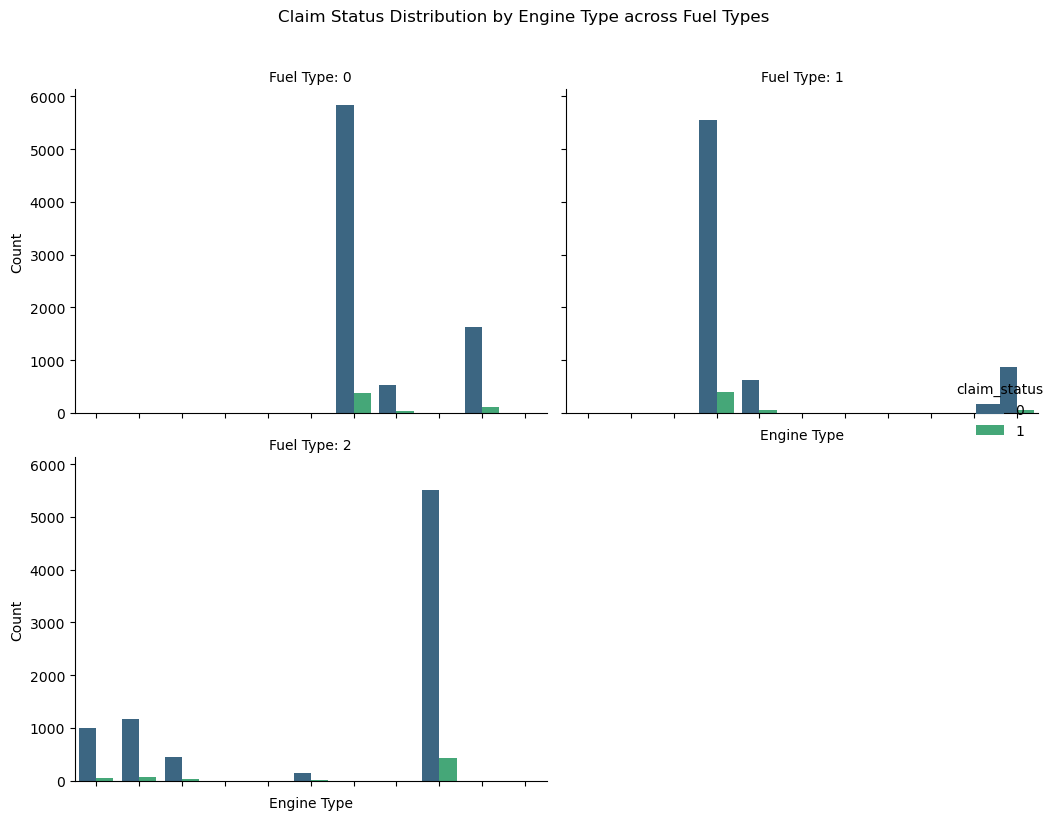

In [64]:
g = sns.catplot(x='engine_type', col='fuel_type', hue='claim_status', data=dataset,
                kind='count', col_wrap=2, height=4, aspect=1.2, palette='viridis')
g.set_axis_labels("Engine Type", "Count")
g.set_titles("Fuel Type: {col_name}")
g.set_xticklabels(rotation=45, ha='right')
plt.suptitle('Claim Status Distribution by Engine Type across Fuel Types', y=1.02)
plt.tight_layout()
plt.show()

#### For all fuel types (0, 1, 2), most vehicles have engine type 2, and most are non-claims (status 0).
#### Claims (status 1) are very few across all combinations of fuel and engine types.
#### Slight variation in claim counts, but no strong influence from engine or fuel type.
#### Claim status is not significantly affected by either fuel_type or engine_type.

###  What is the average `gross_weight` for each `segment` and how does `claim_status` influence it?

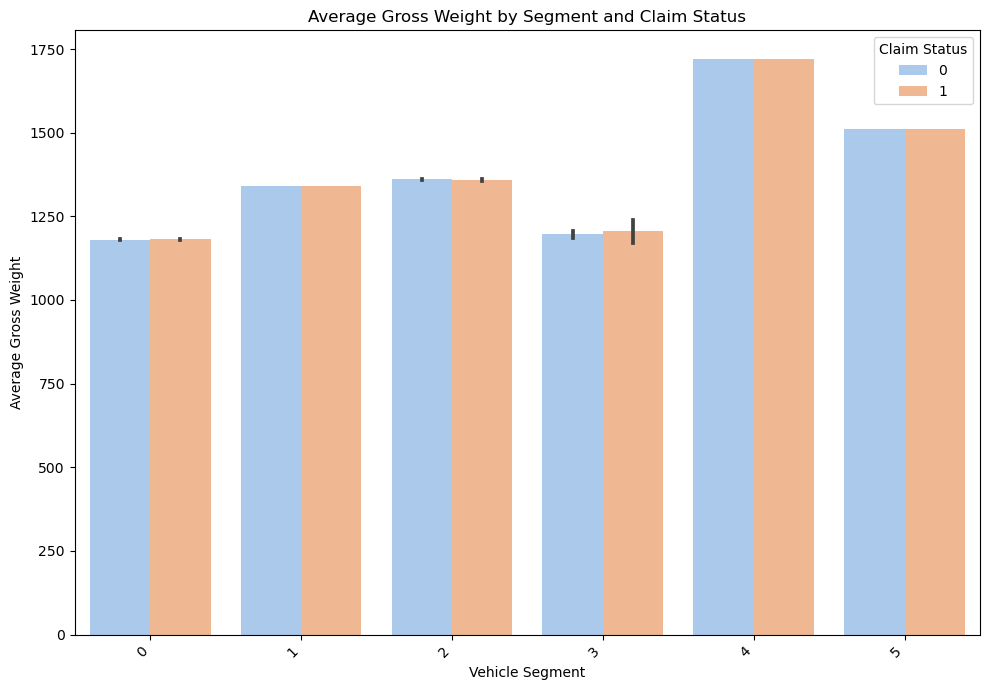

In [65]:
plt.figure(figsize=(10, 7))
sns.barplot(x='segment', y='gross_weight', hue='claim_status',palette='pastel', data=dataset, estimator=lambda x: x.mean())
plt.title('Average Gross Weight by Segment and Claim Status')
plt.xlabel('Vehicle Segment')
plt.ylabel('Average Gross Weight')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Claim Status')
plt.tight_layout()
plt.show()

#### Each vehicle segment has a different average gross weight.
#### Claim and non-claim vehicles have very similar weights within each segment.
#### Segment 4 has the highest gross weight, Segment 0 the lowest.
#### Gross weight varies by segment, but claim status does not significantly affect it.

## Feature Selection and Model Creation

By using this dataset, did research on feature selection, based on that RFE(Recursive Feature Elimination) gives a Better result so develoved a model by using 9 feature in Random Forest Classifier

In [66]:
# importing lib 
import pandas as pd
import numpy as np
import time
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import RFE

In [67]:
# RFE
def rfefeature(indep_X,dep_Y,n):
    rfelist =[]
    log_model = LogisticRegression(solver='lbfgs')
    dt_model = DecisionTreeClassifier(criterion ='gini',max_features ='sqrt',splitter ='best',random_state =0)
    rf_model = RandomForestClassifier(n_estimators =10, criterion ='entropy', random_state =0)
#     nb_model = GaussianNB(priors=None)
    rfemodellist = [log_model,dt_model,rf_model]
    for i in rfemodellist:
        print(i)
        # https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
        log_rfe = RFE(estimator=i, n_features_to_select=n)
        print(log_rfe)
        log_fit = log_rfe.fit(indep_X,dep_Y)
        log_rfe_feature= log_fit.transform(indep_X)
        rfelist.append(log_rfe_feature)
    return rfelist

In [68]:
def split_scalar(indep_X,dep_Y):
    X_train,X_test,Y_train,Y_test = train_test_split(indep_X,dep_Y,test_size=0.30,random_state=0)
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    return X_train,X_test,Y_train,Y_test

In [69]:
def cm_pred(classifier,X_test):
    test_pred = classifier.predict(X_test)
    
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(Y_test,test_pred)
    
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    
    accuracy = accuracy_score(Y_test,test_pred)
    
    report = classification_report(Y_test,test_pred)
    return classifier,accuracy,report,X_test,Y_test,cm

In [70]:
def log(X_train,X_test,Y_train):
    classifier = LogisticRegression(random_state =0)
    classifier.fit(X_train,Y_train)
    classifier,accuracy,report,X_test,Y_test,cm = cm_pred(classifier,X_test)
    return classifier,accuracy,report,X_test,Y_test,cm

In [71]:
def dtree(X_train,X_test,Y_train):
    classifier = DecisionTreeClassifier(criterion ='gini',max_features ='sqrt',splitter ='best',random_state =0)
    classifier.fit(X_train,Y_train)
    classifier,accuracy,report,X_test,Y_test,cm = cm_pred(classifier,X_test)
    return classifier,accuracy,report,X_test,Y_test,cm

In [72]:
def random(X_train,X_test,Y_train):
    classifier =RandomForestClassifier(n_estimators =10, criterion ='entropy', random_state =0)
    classifier.fit(X_train,Y_train)
    classifier,accuracy,report,X_test,Y_test,cm = cm_pred(classifier,X_test)
    return classifier,accuracy,report,X_test,Y_test,cm

In [73]:
def nb(X_train,X_test,Y_train):
    classifier = GaussianNB()
    classifier.fit(X_train,Y_train)
    classifier,accuracy,report,X_test,Y_test,cm = cm_pred(classifier,X_test)
    return classifier,accuracy,report,X_test,Y_test,cm

In [74]:
def knn(X_train,X_test,Y_train):
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(X_train, Y_train)
    classifier,accuracy,report,X_test,Y_test,cm=cm_pred(classifier,X_test)
    return  classifier,accuracy,report,X_test,Y_test,cm

In [75]:
def rfe_classification(acclog,accdtree,accrandom,accnb,accknn):
    rfe_df =pd.DataFrame(index =['Logistic','DecisionTree','RandomForest',],columns = ['Logistic','DecisionTree','RandomForest','NavieBayes','KNN'])
    for number,idex in enumerate(rfe_df.index):
        rfe_df['Logistic'][idex]=acclog[number]
        rfe_df['DecisionTree'][idex]=accdtree[number]
        rfe_df['RandomForest'][idex]=accrandom[number]
        rfe_df['NavieBayes'][idex]=accnb[number]
        rfe_df['KNN'][idex]=accknn[number]

    return rfe_df

In [76]:
dataset =pd.read_csv('Pre_insurance_data.csv',index_col=None)
df = dataset

In [77]:

df

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,9.3,1.2,41,8794,6,1493,4,5.2,4300,1790,...,1,1,1,1,1,1,1,0,1,1
1,8.2,1.8,35,27003,2,1498,4,4.9,3995,1695,...,0,1,0,1,1,1,1,1,1,1
2,9.5,0.2,44,8794,6,1493,4,5.2,4300,1790,...,1,1,1,1,1,1,1,0,1,1
3,5.2,0.4,44,73430,2,796,3,4.6,3445,1515,...,0,0,0,0,0,1,0,0,0,1
4,10.1,1.0,56,5410,2,1497,4,5.0,3990,1755,...,0,0,0,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24931,12.3,1.8,43,4076,2,1197,4,4.8,3995,1735,...,0,1,1,1,1,1,1,1,1,1
24932,12.2,0.2,40,4990,2,1199,3,5.1,3993,1811,...,0,1,1,1,1,1,1,0,1,0
24933,12.1,1.8,57,27003,6,1493,4,5.2,4300,1790,...,1,1,1,1,1,1,1,0,1,1
24934,3.9,2.2,48,5410,2,1197,4,4.8,3845,1735,...,0,0,1,1,1,1,1,1,1,1


In [78]:
indep_X = df.drop('claim_status',axis =1)
dep_Y = df['claim_status']

In [79]:
rfelist = rfefeature(indep_X,dep_Y,9)

LogisticRegression()
RFE(estimator=LogisticRegression(), n_features_to_select=9)


C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

DecisionTreeClassifier(max_features='sqrt', random_state=0)
RFE(estimator=DecisionTreeClassifier(max_features='sqrt', random_state=0),
    n_features_to_select=9)
RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)
RFE(estimator=RandomForestClassifier(criterion='entropy', n_estimators=10,
                                     random_state=0),
    n_features_to_select=9)


In [80]:
acclog=[]
accdtree=[]
accrandom=[]
accnb=[]
accknn=[]

In [81]:
for i in rfelist:
    X_train,X_test,Y_train,Y_test = split_scalar(i,dep_Y)
    classifier,accuracy,report,X_test,Y_test,cm =log(X_train,X_test,Y_train)
    acclog.append(accuracy)
    classifier,accuracy,report,X_test,Y_test,cm =dtree(X_train,X_test,Y_train)
    accdtree.append(accuracy)
    classifier,accuracy,report,X_test,Y_test,cm =random(X_train,X_test,Y_train)
    accrandom.append(accuracy)
    classifier,accuracy,report,X_test,Y_test,cm =nb(X_train,X_test,Y_train)
    accnb.append(accuracy)
    classifier,accuracy,report,X_test,Y_test,cm =knn(X_train,X_test,Y_train)
    accknn.append(accuracy)

C:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarn

In [82]:
result = rfe_classification(acclog,accdtree,accrandom,accnb,accknn) #9

In [83]:
result #9

,Logistic,DecisionTree,RandomForest,NavieBayes,KNN
Logistic,0.93303,0.932228,0.932228,0.93303,0.93303
DecisionTree,0.93303,0.871274,0.926614,0.93303,0.929822
RandomForest,0.93303,0.872744,0.925277,0.93303,0.929956


In [84]:
# import library 
import pandas as pd
import numpy as np
import time
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import RFE

In [85]:
# load the data
dataset = pd.read_csv('Pre_insurance_data.csv')
dataset


,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,9.3,1.2,41,8794,6,1493,4,5.2,4300,1790,...,1,1,1,1,1,1,1,0,1,1
1,8.2,1.8,35,27003,2,1498,4,4.9,3995,1695,...,0,1,0,1,1,1,1,1,1,1
2,9.5,0.2,44,8794,6,1493,4,5.2,4300,1790,...,1,1,1,1,1,1,1,0,1,1
3,5.2,0.4,44,73430,2,796,3,4.6,3445,1515,...,0,0,0,0,0,1,0,0,0,1
4,10.1,1.0,56,5410,2,1497,4,5.0,3990,1755,...,0,0,0,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24931,12.3,1.8,43,4076,2,1197,4,4.8,3995,1735,...,0,1,1,1,1,1,1,1,1,1
24932,12.2,0.2,40,4990,2,1199,3,5.1,3993,1811,...,0,1,1,1,1,1,1,0,1,0
24933,12.1,1.8,57,27003,6,1493,4,5.2,4300,1790,...,1,1,1,1,1,1,1,0,1,1
24934,3.9,2.2,48,5410,2,1197,4,4.8,3845,1735,...,0,0,1,1,1,1,1,1,1,1


In [86]:
dataset.columns

Index(['subscription_length', 'vehicle_age', 'customer_age', 'region_density',
       'airbags', 'displacement', 'cylinder', 'turning_radius', 'length',
       'width', 'gross_weight', 'ncap_rating', 'claim_status', 'segment',
       'fuel_type', 'engine_type', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [87]:
# spliting the data into input and output

independent = dataset[['subscription_length', 'vehicle_age', 'customer_age', 'region_density',
       'airbags', 'displacement', 'cylinder', 'turning_radius', 'length',
       'width', 'gross_weight', 'ncap_rating','segment',
       'fuel_type', 'engine_type', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert']]
dependent = dataset[['claim_status']]

In [88]:
# split the training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(independent, dependent, test_size=1/3, random_state=0)
X_train

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
7664,10.7,0.6,35,34738,2,796,3,4.6,3445,1515,...,0,0,0,0,0,1,0,0,0,1
23649,2.3,3.4,48,8794,6,1493,4,5.2,4300,1790,...,1,1,1,1,1,1,1,0,1,1
17620,0.2,0.6,44,27003,2,999,3,5.0,3731,1579,...,0,0,0,1,1,1,0,1,1,1
6375,12.0,1.8,62,8794,2,1197,4,4.8,3845,1735,...,0,0,1,1,1,1,1,1,1,1
17104,10.7,2.2,43,27003,2,1197,4,4.8,3845,1735,...,0,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,7.9,2.2,35,8794,2,1197,4,4.8,3845,1735,...,0,0,1,1,1,1,1,1,1,1
19648,11.9,0.4,44,8794,6,1493,4,5.2,4300,1790,...,1,1,1,1,1,1,1,0,1,1
9845,2.4,0.2,49,34738,6,1493,4,5.2,4300,1790,...,1,1,1,1,1,1,1,0,1,1
10799,4.8,0.4,41,34738,2,1197,4,4.8,3845,1735,...,0,0,1,1,1,1,1,1,1,1


In [89]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:
# RFE
def rfefeature(indep_X,dep_Y,n):
    rfelist =[]
    selected_features = {}

    log_model = LogisticRegression(solver='liblinear')
    dt_model = DecisionTreeClassifier(criterion ='gini',max_features ='sqrt',splitter ='best',random_state =0)
    rf_model = RandomForestClassifier(n_estimators =10, criterion ='entropy', random_state =0)
#     nb_model = GaussianNB(priors=None)
    rfemodellist = [log_model,dt_model,rf_model]
    for model in rfemodellist:
        print(model)
        # https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
        log_rfe = RFE(estimator=model, n_features_to_select=n)
        print(log_rfe)
        log_fit = log_rfe.fit(indep_X,dep_Y)
        log_rfe_feature= log_fit.transform(indep_X)
        selected_columns = indep_X.columns[log_rfe.support_].tolist()
        selected_features[model.__class__.__name__] = selected_columns
        rfelist.append(log_rfe_feature)
    return rfelist,selected_features

In [91]:
def split_scalar(indep_X,dep_Y):
    X_train,X_test,Y_train,Y_test = train_test_split(indep_X,dep_Y,test_size=0.30,random_state=0)
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    return X_train,X_test,Y_train,Y_test

In [92]:
def cm_pred(classifier,X_test):
    test_pred = classifier.predict(X_test)
    
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(Y_test,test_pred)
    
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    
    accuracy = accuracy_score(Y_test,test_pred)
    
    report = classification_report(Y_test,test_pred)
    return classifier,accuracy,report,X_test,Y_test,cm

In [93]:
def log(X_train,X_test,Y_train):
    classifier = LogisticRegression(solver='liblinear',max_iter=2000,random_state =0)
    classifier.fit(X_train,Y_train)
    classifier,accuracy,report,X_test,Y_test,cm = cm_pred(classifier,X_test)
    return classifier,accuracy,report,X_test,Y_test,cm

In [94]:
def dtree(X_train,X_test,Y_train):
    classifier = DecisionTreeClassifier(criterion ='gini',max_features ='sqrt',splitter ='best',random_state =0)
    classifier.fit(X_train,Y_train)
    classifier,accuracy,report,X_test,Y_test,cm = cm_pred(classifier,X_test)
    return classifier,accuracy,report,X_test,Y_test,cm

In [95]:
def random(X_train,X_test,Y_train):
    classifier =RandomForestClassifier(n_estimators =10, criterion ='entropy', random_state =0)
    classifier.fit(X_train,Y_train)
    classifier,accuracy,report,X_test,Y_test,cm = cm_pred(classifier,X_test)
    return classifier,accuracy,report,X_test,Y_test,cm

In [96]:
def nb(X_train,X_test,Y_train):
    classifier = GaussianNB()
    classifier.fit(X_train,Y_train)
    classifier,accuracy,report,X_test,Y_test,cm = cm_pred(classifier,X_test)
    return classifier,accuracy,report,X_test,Y_test,cm

In [97]:
def knn(X_train,X_test,Y_train):
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(X_train, Y_train)
    classifier,accuracy,report,X_test,Y_test,cm=cm_pred(classifier,X_test)
    return  classifier,accuracy,report,X_test,Y_test,cm

In [98]:
def rfe_classification(acclog,accdtree,accrandom,accnb,accknn):
    rfe_df =pd.DataFrame(index =['Logistic','DecisionTree','RandomForest',],columns = ['Logistic','DecisionTree','RandomForest','NavieBayes','KNN'])
    for number,idex in enumerate(rfe_df.index):
        rfe_df['Logistic'][idex]=acclog[number]

        rfe_df['DecisionTree'][idex]=accdtree[number]
        rfe_df['RandomForest'][idex]=accrandom[number]
        rfe_df['NavieBayes'][idex]=accnb[number]
        rfe_df['KNN'][idex]=accknn[number]

    return rfe_df

In [99]:
indep_X = dataset.drop('claim_status',axis =1)
dep_Y = dataset['claim_status']

In [100]:
rfelist,selected_features= rfefeature(indep_X,dep_Y,9)

LogisticRegression(solver='liblinear')
RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=9)
DecisionTreeClassifier(max_features='sqrt', random_state=0)
RFE(estimator=DecisionTreeClassifier(max_features='sqrt', random_state=0),
    n_features_to_select=9)
RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)
RFE(estimator=RandomForestClassifier(criterion='entropy', n_estimators=10,
                                     random_state=0),
    n_features_to_select=9)


In [101]:
acclog=[]
accdtree=[]
accrandom=[]
accnb=[]
accknn=[]

In [102]:
for i in rfelist:
    X_train,X_test,Y_train,Y_test = split_scalar(i,dep_Y)
    classifier,accuracy,report,X_test,Y_test,cm =log(X_train,X_test,Y_train)
    acclog.append(accuracy)
    classifier,accuracy,report,X_test,Y_test,cm =dtree(X_train,X_test,Y_train)
    accdtree.append(accuracy)
    classifier,accuracy,report,X_test,Y_test,cm =random(X_train,X_test,Y_train)
    accrandom.append(accuracy)
    classifier,accuracy,report,X_test,Y_test,cm =nb(X_train,X_test,Y_train)
    accnb.append(accuracy)
    classifier,accuracy,report,X_test,Y_test,cm =knn(X_train,X_test,Y_train)                              
    accknn.append(accuracy)

    
result = rfe_classification(acclog,accdtree,accrandom,accnb,accknn)
result
print("Selected Features:")
for model_name, features in selected_features.items():
    print(f"{model_name}: {features}")

C:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarn

Selected Features:
LogisticRegression: ['vehicle_age', 'turning_radius', 'ncap_rating', 'is_esc', 'is_tpms', 'is_parking_camera', 'transmission_type', 'is_front_fog_lights', 'is_rear_window_defogger']
DecisionTreeClassifier: ['subscription_length', 'vehicle_age', 'customer_age', 'region_density', 'turning_radius', 'length', 'gross_weight', 'segment', 'engine_type']
RandomForestClassifier: ['subscription_length', 'vehicle_age', 'customer_age', 'region_density', 'turning_radius', 'length', 'width', 'gross_weight', 'engine_type']


### Random Forest classifier

In [103]:
#Model Creation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[10,50,100], 
              'criterion':['gini', 'entropy', 'log_loss'],
              'max_features':['sqrt', 'log2']}

grid = GridSearchCV(RandomForestClassifier(),parameters, refit = True, verbose =3, n_jobs=-1, scoring='f1') 
#refit true is for finding the best model,
#false will give last model
#https://scikit-learn.org/stable/modules/model_evaluation.html - for scoring 
grid.fit(X_train,Y_train) # can able to call directly without training and testing 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             scoring='f1', verbose=3)

In [104]:
print(grid.best_params_)

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 10}


In [105]:
classifier = grid.cv_results_ 
classifier
print('The value for best parameter: ',format(grid.best_params_))

The value for best parameter:  {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 10}


In [106]:
table = pd.DataFrame.from_dict(classifier)
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.323742,0.025426,0.015787,0.001807,gini,sqrt,10,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.007843,0.016000,0.016461,0.015936,0.008130,0.012874,0.003996,2
1,1.615242,0.061582,0.064237,0.003526,gini,sqrt,50,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.000000,0.000000,0.016598,0.008264,0.000000,0.004972,0.006636,16
2,3.461195,0.085149,0.121128,0.004109,gini,sqrt,100,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.000000,0.000000,0.008197,0.016807,0.000000,0.005001,0.006703,14
3,0.357734,0.003308,0.017914,0.001534,gini,log2,10,"{'criterion': 'gini', 'max_features': 'log2', ...",0.000000,0.008197,0.023904,0.008065,0.000000,0.008033,0.008729,8
4,1.736967,0.004668,0.064313,0.004008,gini,log2,50,"{'criterion': 'gini', 'max_features': 'log2', ...",0.008439,0.000000,0.008299,0.016667,0.000000,0.006681,0.006240,10
5,3.547937,0.044018,0.116452,0.004501,gini,log2,100,"{'criterion': 'gini', 'max_features': 'log2', ...",0.000000,0.000000,0.016736,0.008264,0.000000,0.005000,0.006684,15
6,0.371241,0.004886,0.018057,0.001516,entropy,sqrt,10,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.016000,0.000000,0.008097,0.008130,0.015686,0.009583,0.005909,4
7,1.903729,0.024243,0.062026,0.002339,entropy,sqrt,50,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.000000,0.000000,0.016667,0.016327,0.008299,0.008258,0.007378,6
8,3.753187,0.019056,0.124514,0.005910,entropy,sqrt,100,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.000000,0.000000,0.024896,0.008333,0.000000,0.006646,0.009679,11
9,0.387142,0.027231,0.017813,0.000583,entropy,log2,10,"{'criterion': 'entropy', 'max_features': 'log2...",0.000000,0.000000,0.024000,0.024793,0.016327,0.013024,0.011038,1


In [107]:
grid_pred = grid.predict(X_test)
grid_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [108]:
#Evalution using confusion matrix
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(Y_test,grid_pred)
con_mat


array([[6919,   61],
       [ 495,    6]], dtype=int64)

In [109]:
#To create a classification report
from sklearn.metrics import classification_report
class_report = classification_report(Y_test,grid_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6980
           1       0.09      0.01      0.02       501

    accuracy                           0.93      7481
   macro avg       0.51      0.50      0.49      7481
weighted avg       0.88      0.93      0.90      7481



In [110]:
from sklearn.metrics import f1_score
f1_macro=f1_score(Y_test,grid_pred,average='weighted')
print("The f1_macro value for best parameter {}:".format(grid.best_params_),f1_macro)

The f1_macro value for best parameter {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 10}: 0.8984048403551068


In [111]:
from sklearn.metrics import roc_auc_score #Receiver Operating Characteristic Curve, Area Under the curve
roc_auc_score(Y_test,grid.predict_proba(X_test)[:,1]) # to get a greater probability value, [:,1][R,C]

0.5292425178296701

In [112]:
dataset.columns

Index(['subscription_length', 'vehicle_age', 'customer_age', 'region_density',
       'airbags', 'displacement', 'cylinder', 'turning_radius', 'length',
       'width', 'gross_weight', 'ncap_rating', 'claim_status', 'segment',
       'fuel_type', 'engine_type', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [114]:
def get_categorical_prediction(prediction):
    return "Yes" if prediction == 1 else "No"
subscription_length = float(input("Subscription Length (e.g., 10.5): "))
vehicle_age = float(input("Vehicle Age in years (e.g., 1.2): "))
customer_age = int(input("Customer Age: "))
region_density = int(input("Region Density: "))
airbags = int(input("Number of Airbags: "))
displacement = int(input("Engine Displacement (cc): "))
cylinder = int(input("Number of Cylinders: "))
turning_radius = float(input("Turning Radius (e.g., 5.2): "))
length = int(input("Vehicle Length (mm): "))
width = int(input("Vehicle Width (mm): "))
gross_weight = int(input("Gross Weight (kg): "))
ncap_rating = int(input("NCAP Rating (1–5): "))
segment = int(input("Segment (encoded as int): "))
fuel_type = int(input("Fuel Type (encoded as int): "))
engine_type = int(input("Engine Type (encoded as int): "))
is_esc = int(input("ESC Available (0 = No, 1 = Yes): "))
is_adjustable_steering = int(input("Adjustable Steering (0/1): "))
is_tpms = int(input("TPMS Present (0/1): "))
is_parking_sensors = int(input("Parking Sensors (0/1): "))
is_parking_camera = int(input("Parking Camera (0/1): "))
rear_brakes_type = int(input("Rear Brakes Type (encoded): "))
transmission_type = int(input("Transmission Type (encoded): "))
steering_type = int(input("Steering Type (encoded): "))
is_front_fog_lights = int(input("Front Fog Lights (0/1): "))
is_rear_window_wiper = int(input("Rear Window Wiper (0/1): "))
is_rear_window_washer = int(input("Rear Window Washer (0/1): "))
is_rear_window_defogger = int(input("Rear Window Defogger (0/1): "))
is_brake_assist = int(input("Brake Assist (0/1): "))
is_power_door_locks = int(input("Power Door Locks (0/1): "))
is_central_locking = int(input("Central Locking (0/1): "))
is_power_steering = int(input("Power Steering (0/1): "))
is_driver_seat_height_adjustable = int(input("Height Adjustable Driver Seat (0/1): "))
is_day_night_rear_view_mirror = int(input("Day/Night Rear View Mirror (0/1): "))
is_ecw = int(input("ECW Feature (0/1): "))
is_speed_alert = int(input("Speed Alert (0/1): "))



#Only use the 9 selected features for prediction
selected_input = [[
    subscription_length, vehicle_age,
customer_age, region_density, turning_radius, 
length, width, gross_weight, engine_type
]]



# subscription_length,    region_density,displacement,  length,  gross_weight,  vehicle_age,  ncap_rating,  airbags,  fuel_type

Subscription Length (e.g., 10.5): 8.5
Vehicle Age in years (e.g., 1.2): 1.3
Customer Age: 45
Region Density: 12000
Number of Airbags: 6
Engine Displacement (cc): 1500
Number of Cylinders: 4
Turning Radius (e.g., 5.2): 5.1
Vehicle Length (mm): 4200
Vehicle Width (mm): 1780
Gross Weight (kg): 1400
NCAP Rating (1–5): 5
Segment (encoded as int): 2
Fuel Type (encoded as int): 1
Engine Type (encoded as int): 3
ESC Available (0 = No, 1 = Yes): 1
Adjustable Steering (0/1): 1
TPMS Present (0/1): 1
Parking Sensors (0/1): 1
Parking Camera (0/1): 1
Rear Brakes Type (encoded): 2
Transmission Type (encoded): 1
Steering Type (encoded): 2
Front Fog Lights (0/1): 1
Rear Window Wiper (0/1): 1
Rear Window Washer (0/1): 1
Rear Window Defogger (0/1): 1
Brake Assist (0/1): 1
Power Door Locks (0/1): 1
Central Locking (0/1): 1
Power Steering (0/1): 1
Height Adjustable Driver Seat (0/1): 1
Day/Night Rear View Mirror (0/1): 1
ECW Feature (0/1): 1
Speed Alert (0/1): 1


In [115]:
#Make prediction using trained model
Final_prediction = grid.predict(selected_input)
future_prediction_categorical = get_categorical_prediction(Final_prediction[0])
print("Will this customer file an insurance claim?:", future_prediction_categorical)


Will this customer file an insurance claim?: No


In [116]:
#Saving the model
import pickle
filename= "Insurance_Claims_Prediction.sav"

In [117]:
pickle.dump(grid,open(filename,'wb'))
load_model=pickle.load(open("Insurance_Claims_Prediction.sav",'rb'))

In [118]:
def get_categorical_prediction(prediction):
    return "Yes" if prediction == 1 else "No"
subscription_length = float(input("Subscription Length (e.g., 10.5): "))
vehicle_age = float(input("Vehicle Age in years (e.g., 1.2): "))
customer_age = int(input("Customer Age: "))
region_density = int(input("Region Density: "))
airbags = int(input("Number of Airbags: "))
displacement = int(input("Engine Displacement (cc): "))
cylinder = int(input("Number of Cylinders: "))
turning_radius = float(input("Turning Radius (e.g., 5.2): "))
length = int(input("Vehicle Length (mm): "))
width = int(input("Vehicle Width (mm): "))
gross_weight = int(input("Gross Weight (kg): "))
ncap_rating = int(input("NCAP Rating (1–5): "))
segment = int(input("Segment (encoded as int): "))
fuel_type = int(input("Fuel Type (encoded as int): "))
engine_type = int(input("Engine Type (encoded as int): "))
is_esc = int(input("ESC Available (0 = No, 1 = Yes): "))
is_adjustable_steering = int(input("Adjustable Steering (0/1): "))
is_tpms = int(input("TPMS Present (0/1): "))
is_parking_sensors = int(input("Parking Sensors (0/1): "))
is_parking_camera = int(input("Parking Camera (0/1): "))
rear_brakes_type = int(input("Rear Brakes Type (encoded): "))
transmission_type = int(input("Transmission Type (encoded): "))
steering_type = int(input("Steering Type (encoded): "))
is_front_fog_lights = int(input("Front Fog Lights (0/1): "))
is_rear_window_wiper = int(input("Rear Window Wiper (0/1): "))
is_rear_window_washer = int(input("Rear Window Washer (0/1): "))
is_rear_window_defogger = int(input("Rear Window Defogger (0/1): "))
is_brake_assist = int(input("Brake Assist (0/1): "))
is_power_door_locks = int(input("Power Door Locks (0/1): "))
is_central_locking = int(input("Central Locking (0/1): "))
is_power_steering = int(input("Power Steering (0/1): "))
is_driver_seat_height_adjustable = int(input("Height Adjustable Driver Seat (0/1): "))
is_day_night_rear_view_mirror = int(input("Day/Night Rear View Mirror (0/1): "))
is_ecw = int(input("ECW Feature (0/1): "))
is_speed_alert = int(input("Speed Alert (0/1): "))


#Only use the 9 selected features for prediction
selected_input = [[
    subscription_length, vehicle_age,
customer_age, region_density, turning_radius, 
length, width, gross_weight, engine_type
]]


Subscription Length (e.g., 10.5): 8.5
Vehicle Age in years (e.g., 1.2): 1.3
Customer Age: 45
Region Density: 12000
Number of Airbags: 6
Engine Displacement (cc): 1500
Number of Cylinders: 4
Turning Radius (e.g., 5.2): 5.1
Vehicle Length (mm): 4200
Vehicle Width (mm): 1780
Gross Weight (kg): 1400
NCAP Rating (1–5): 5
Segment (encoded as int): 2
Fuel Type (encoded as int): 1
Engine Type (encoded as int): 3
ESC Available (0 = No, 1 = Yes): 1
Adjustable Steering (0/1): 1
TPMS Present (0/1): 1
Parking Sensors (0/1): 1
Parking Camera (0/1): 1
Rear Brakes Type (encoded): 2
Transmission Type (encoded): 1
Steering Type (encoded): 2
Front Fog Lights (0/1): 1
Rear Window Wiper (0/1): 1
Rear Window Washer (0/1): 1
Rear Window Defogger (0/1): 1
Brake Assist (0/1): 1
Power Door Locks (0/1): 1
Central Locking (0/1): 1
Power Steering (0/1): 1
Height Adjustable Driver Seat (0/1): 1
Day/Night Rear View Mirror (0/1): 1
ECW Feature (0/1): 1
Speed Alert (0/1): 1


In [119]:
#Make prediction using trained model
Final_result = load_model.predict(selected_input)


In [120]:
future_prediction_categorical = get_categorical_prediction(Final_result)
future_prediction_categorical

'No'

In [121]:
# Print the categorical prediction
#future_prediction_categorical = 'Yes' if Final_result[0] == 1 else 'No'

print("Whether this Customer will file an insurance claim:", future_prediction_categorical)

Whether this Customer will file an insurance claim: No


## Deployement

In [122]:
import pickle

In [123]:
load_model=pickle.load(open("Insurance_Claims_Prediction.sav",'rb'))

In [128]:
def get_categorical_prediction(prediction):
    return "Yes" if prediction == 1 else "No"
subscription_length = float(input("Subscription Length (e.g., 10.5): "))
vehicle_age = float(input("Vehicle Age in years (e.g., 1.2): "))
customer_age = int(input("Customer Age: "))
region_density = int(input("Region Density: "))
airbags = int(input("Number of Airbags: "))
displacement = int(input("Engine Displacement (cc): "))
cylinder = int(input("Number of Cylinders: "))
turning_radius = float(input("Turning Radius (e.g., 5.2): "))
length = int(input("Vehicle Length (mm): "))
width = int(input("Vehicle Width (mm): "))
gross_weight = int(input("Gross Weight (kg): "))
ncap_rating = int(input("NCAP Rating (1–5): "))
segment = int(input("Segment (encoded as int): "))
fuel_type = int(input("Fuel Type (encoded as int): "))
engine_type = int(input("Engine Type (encoded as int): "))
is_esc = int(input("ESC Available (0 = No, 1 = Yes): "))
is_adjustable_steering = int(input("Adjustable Steering (0/1): "))
is_tpms = int(input("TPMS Present (0/1): "))
is_parking_sensors = int(input("Parking Sensors (0/1): "))
is_parking_camera = int(input("Parking Camera (0/1): "))
rear_brakes_type = int(input("Rear Brakes Type (encoded): "))
transmission_type = int(input("Transmission Type (encoded): "))
steering_type = int(input("Steering Type (encoded): "))
is_front_fog_lights = int(input("Front Fog Lights (0/1): "))
is_rear_window_wiper = int(input("Rear Window Wiper (0/1): "))
is_rear_window_washer = int(input("Rear Window Washer (0/1): "))
is_rear_window_defogger = int(input("Rear Window Defogger (0/1): "))
is_brake_assist = int(input("Brake Assist (0/1): "))
is_power_door_locks = int(input("Power Door Locks (0/1): "))
is_central_locking = int(input("Central Locking (0/1): "))
is_power_steering = int(input("Power Steering (0/1): "))
is_driver_seat_height_adjustable = int(input("Height Adjustable Driver Seat (0/1): "))
is_day_night_rear_view_mirror = int(input("Day/Night Rear View Mirror (0/1): "))
is_ecw = int(input("ECW Feature (0/1): "))
is_speed_alert = int(input("Speed Alert (0/1): "))


#Only use the 9 selected features for prediction
selected_input = [[
    subscription_length, vehicle_age,
customer_age, region_density, turning_radius, 
length, width, gross_weight, engine_type
]]


Subscription Length (e.g., 10.5): 8.5
Vehicle Age in years (e.g., 1.2): 1.3
Customer Age: 45
Region Density: 12000
Number of Airbags: 6
Engine Displacement (cc): 1500
Number of Cylinders: 4
Turning Radius (e.g., 5.2): 5.1
Vehicle Length (mm): 4200
Vehicle Width (mm): 1780
Gross Weight (kg): 1400
NCAP Rating (1–5): 5
Segment (encoded as int): 2
Fuel Type (encoded as int): 1
Engine Type (encoded as int): 3
ESC Available (0 = No, 1 = Yes): 1
Adjustable Steering (0/1): 1
TPMS Present (0/1): 1
Parking Sensors (0/1): 1
Parking Camera (0/1): 1
Rear Brakes Type (encoded): 2
Transmission Type (encoded): 1
Steering Type (encoded): 2
Front Fog Lights (0/1): 1
Rear Window Wiper (0/1): 1
Rear Window Washer (0/1): 1
Rear Window Defogger (0/1): 1
Brake Assist (0/1): 1
Power Door Locks (0/1): 1
Central Locking (0/1): 1
Power Steering (0/1): 1
Height Adjustable Driver Seat (0/1): 1
Day/Night Rear View Mirror (0/1): 1
ECW Feature (0/1): 1
Speed Alert (0/1): 1


In [129]:
#Make prediction using trained model
Final_result = load_model.predict(selected_input)


In [130]:
future_prediction_categorical = get_categorical_prediction(Final_result)
future_prediction_categorical

'No'

In [131]:
# Print the categorical prediction
#future_prediction_categorical = 'Yes' if Final_result[0] == 1 else 'No'

print("Whether this Customer will file an insurance claim:", future_prediction_categorical)

Whether this Customer will file an insurance claim: No
